In [1]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn umap-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

# Forel 2024-25 Dataset Cleaning

In [2]:
df = pd.read_csv("../datasets/Forel_2024_25.csv")
df.columns

Index(['TIMESTAMP_MIDDLE', 'FN2O_L3.3_CUT_50_QCF0',
       'NEE_L3.3_CUT_50_QCF0_gfXGBoost', 'GPP_U50_f_reddyproc',
       'Reco_U50_reddyproc', 'SW_IN_T1_2_1', 'TA_M1_2_1', 'PREC_M1_2_1', 'VPD',
       'TS_GF2_0.05_1_gfXG', 'TS_GF2_0.10_1_gfXG', 'TS_GF2_0.20_1_gfXG',
       'TS_GF2_0.30_1_gfXG', 'TS_GF2_0.40_1_gfXG', 'TS_GF2_0.50_1_gfXG',
       'SWC_GF2_0.05_1_gfXG', 'SWC_GF2_0.1_1_gfXG', 'SWC_GF2_0.2_1_gfXG',
       'SWC_GF2_0.3_1_gfXG', 'SWC_GF2_0.4_1_gfXG', 'SWC_GF2_0.5_1_gfXG',
       'MGMT_HARVEST', 'MGMT_FERT_ORG', 'MGMT_FERT_MIN'],
      dtype='object')

In [3]:
df.head(10)

TIMESTAMP_MIDDLE  FN2O_L3.3_CUT_50_QCF0  NEE_L3.3_CUT_50_QCF0_gfXGBoost  \
0  2024-03-06 23:45:00                    NaN                             NaN   
1  2024-03-07 00:15:00                    NaN                             NaN   
2  2024-03-07 00:45:00                    NaN                             NaN   
3  2024-03-07 01:15:00                    NaN                             NaN   
4  2024-03-07 01:45:00                    NaN                             NaN   
5  2024-03-07 02:15:00                    NaN                             NaN   
6  2024-03-07 02:45:00                    NaN                             NaN   
7  2024-03-07 03:15:00                    NaN                             NaN   
8  2024-03-07 03:45:00                    NaN                             NaN   
9  2024-03-07 04:15:00                    NaN                             NaN   

   GPP_U50_f_reddyproc  Reco_U50_reddyproc  SW_IN_T1_2_1  TA_M1_2_1  \
0                  NaN                 NaN           NaN        NaN   
1                  NaN                 NaN           NaN        NaN   
2                  NaN                 NaN           NaN        NaN   
3                  NaN                 NaN           NaN        NaN   
4                  NaN                 NaN           NaN        NaN   
5                  NaN                 NaN           NaN        NaN   
6                  NaN                 NaN           NaN        NaN   
7                  NaN                 NaN           NaN        NaN   
8                  NaN                 NaN           NaN        NaN   
9                  NaN                 NaN           NaN        NaN   

   PREC_M1_2_1  VPD  TS_GF2_0.05_1_gfXG  TS_GF2_0.10_1_gfXG  \
0          NaN  NaN                 NaN                 NaN   
1          NaN  NaN                 NaN                 NaN   
2          NaN  NaN                 NaN                 NaN   
3          NaN  NaN                 NaN                 NaN   
4          NaN  NaN                 NaN                 NaN   
5          NaN  NaN                 NaN                 NaN   
6          NaN  NaN                 NaN                 NaN   
7          NaN  NaN                 NaN                 NaN   
8          NaN  NaN                 NaN                 NaN   
9          NaN  NaN                 NaN                 NaN   

   TS_GF2_0.20_1_gfXG  TS_GF2_0.30_1_gfXG  TS_GF2_0.40_1_gfXG  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   
5                 NaN                 NaN                 NaN   
6                 NaN                 NaN                 NaN   
7                 NaN                 NaN                 NaN   
8                 NaN                 NaN                 NaN   
9                 NaN                 NaN                 NaN   

   TS_GF2_0.50_1_gfXG  SWC_GF2_0.05_1_gfXG  SWC_GF2_0.1_1_gfXG  \
0                 NaN                  NaN                 NaN   
1                 NaN                  NaN                 NaN   
2                 NaN                  NaN                 NaN   
3                 NaN                  NaN                 NaN   
4                 NaN                  NaN                 NaN   
5                 NaN                  NaN                 NaN   
6                 NaN                  NaN                 NaN   
7                 NaN                  NaN                 NaN   
8                 NaN                  NaN                 NaN   
9                 NaN                  NaN                 NaN   

   SWC_GF2_0.2_1_gfXG  SWC_GF2_0.3_1_gfXG  SWC_GF2_0.4_1_gfXG  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   


In [27]:
cols = [
    # Target
    "FN2O_L3.3_CUT_50_QCF0",

    # Timestamp
    "TIMESTAMP_MIDDLE",
    
    # Predictors
    "NEE_L3.3_CUT_50_QCF0_gfXGBoost",
    "GPP_U50_f_reddyproc",
    "Reco_U50_reddyproc",
    "SW_IN_T1_2_1",
    "TA_M1_2_1",
    "PREC_M1_2_1",
    "VPD",                     # Vapor pressure deficit
    "SWC_GF2_0.05_1_gfXG",
    "SWC_GF2_0.2_1_gfXG",
    "SWC_GF2_0.3_1_gfXG",
    "TS_GF2_0.05_1_gfXG",
    "TS_GF2_0.20_1_gfXG",
    "TS_GF2_0.30_1_gfXG",
    "MGMT_HARVEST",
    "MGMT_FERT_ORG",
    "MGMT_FERT_MIN",
]

forel_24_25 = df[cols]

rename_map = {
    "FN2O_L3.3_CUT_50_QCF0": "N2O_Flux",
    "TIMESTAMP_MIDDLE": "Timestamp",
    "NEE_L3.3_CUT_50_QCF0_gfXGBoost": "NEE",    # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_U50_f_reddyproc": "GPP",                   # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_U50_reddyproc": "RECO",                   # CO₂ emitted via respiration of plants and soil organisms
    "SW_IN_T1_2_1": "SolarRadiation",
    "TA_M1_2_1": "AirTemp",
    "PREC_M1_2_1": "Precipitation",
    "SWC_GF2_0.05_1_gfXG": "SoilWater_5cm",
    "SWC_GF2_0.2_1_gfXG": "SoilWater_15cm",
    "SWC_GF2_0.3_1_gfXG": "SoilWater_30cm",
    "TS_GF2_0.05_1_gfXG": "SoilTemp_5cm",
    "TS_GF2_0.20_1_gfXG": "SoilTemp_15cm",
    "TS_GF2_0.30_1_gfXG": "SoilTemp_30cm",
    "MGMT_HARVEST": "Mowing",
    "MGMT_FERT_ORG": "FertilizerOrganic",
    "MGMT_FERT_MIN": "FertilizerMineral",
    "MGMT_SOILCULTIVATION": "SoilCultivation",
}

forel = forel_24_25.rename(columns=rename_map)

forel["Timestamp"] = pd.to_datetime(forel["Timestamp"])
forel = forel.sort_values("Timestamp")

# Remove duplicate timestamps if any
forel = forel.drop_duplicates(subset=["Timestamp"], keep="first")

forel["year"] = forel["Timestamp"].dt.year
forel["month"] = forel["Timestamp"].dt.month
forel["hour"] = forel["Timestamp"].dt.hour
forel["day"] = forel["Timestamp"].dt.day

# ==========================================================
# Step 3 — Set index + add daily key
# ==========================================================
forel = forel.set_index("Timestamp").sort_index()
forel["Date"] = forel.index.floor("D")

def days_since_event(series, max_days=30):
    days = np.full(len(series), np.nan)
    last_event_idx = None
    for i, val in enumerate(series):
        if val == 1:
            last_event_idx = i
            days[i] = 0
        elif last_event_idx is not None:
            # compute difference using timestamps
            dt = (series.index[i] - series.index[last_event_idx]).total_seconds() / 86400
            days[i] = min(dt, max_days)
        else:
            days[i] = max_days
    return days

for event in ["Mowing", "FertilizerOrganic", "FertilizerMineral"]:
    forel[f"DaysSince_{event}"] = days_since_event(forel[event])
    
# ==========================================================
# Step 4 — Daily aggregation (ONLY for computing lags)
# ==========================================================
forel_daily = (
    forel
    .groupby("Date")
    .agg({
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",
        "Precipitation": "sum",
        "Mowing": "max",
        "FertilizerOrganic": "max",
        "FertilizerMineral": "max",
    })
    .reset_index()
    .sort_values("Date")
)

# ==========================================================
# Step 5 — Build daily lag features (same structure as Aeschi)
# ==========================================================
meteo_daily = [
    "NEE","GPP","RECO","SolarRadiation","AirTemp","VPD",
    "SoilWater_5cm","SoilWater_15cm","SoilWater_30cm",
    "SoilTemp_5cm","SoilTemp_15cm","SoilTemp_30cm",
    "Precipitation"
]

lag_days     = [1,3,5,7]
roll_windows = [3,5,7]

forel_daily = forel_daily.set_index("Date").asfreq("D")
forel_daily.index.name = "Date"

lagcols = []

# Simple daily lags
for var in meteo_daily:
    for lag in lag_days:
        lagcols.append(
            forel_daily[var].shift(lag).rename(f"{var}_lag{lag}d")
        )

# Rolling means + sums
shifted = forel_daily[meteo_daily].shift(1)
for var in meteo_daily:
    for w in roll_windows:
        lagcols.append(
            shifted[var]
            .rolling(w, min_periods=1)
            .mean()
            .rename(f"{var}_roll{w}d_mean")
        )
        lagcols.append(
            shifted[var]
            .rolling(w, min_periods=1)
            .sum()
            .rename(f"{var}_roll{w}d_sum")
        )

# Assemble into a clean feature table
forel_daily_lags = pd.concat(lagcols, axis=1).reset_index()

# ==========================================================
# Step 6 — Merge daily lag features BACK to hourly dataset
# ==========================================================
forel = forel.reset_index()  # bring Timestamp back
forel = forel.merge(forel_daily_lags, on="Date", how="left")

# ==========================================================
# Step 7 — Final cleanup
# ==========================================================
forel = forel.set_index("Timestamp").sort_index()
forel = forel[forel["N2O_Flux"].notna()]

forel["N2O_Flux_ln"] = np.where(
    forel["N2O_Flux"] > 0,
    np.log1p(forel["N2O_Flux"]),
    0
)

In [5]:
forel.tail(10)

N2O_Flux        NEE       GPP       RECO  SolarRadiation  \
Timestamp                                                                       
2025-05-02 20:45:00  0.301634  12.768697 -0.339302  12.429395        0.000000   
2025-05-02 21:45:00  0.453157  12.164708 -0.335214  11.829493        0.000000   
2025-05-02 22:45:00  0.344138  11.199376  0.315663  11.515039        0.000000   
2025-05-03 00:15:00 -0.304762  10.891081  0.378152  11.269233        0.000000   
2025-05-03 06:15:00  0.325160   5.692870  3.318391   9.011261       32.049905   
2025-05-03 10:15:00  1.917240  10.001107 -0.069611   9.931496      224.089913   
2025-05-03 11:15:00  1.754296  10.452008 -0.379829  10.072179      270.121063   
2025-05-03 11:45:00  2.190882  10.849968 -0.419880  10.430088      425.732503   
2025-05-03 12:15:00  2.144901  10.578162  0.337307  10.915469      558.165833   
2025-05-03 13:15:00  1.121419   9.398912  2.125875  11.524787      594.446510   

                       AirTemp  Precipitation       VPD  SoilWater_5cm  \
Timestamp                                                                
2025-05-02 20:45:00  18.726667          0.000  0.780841      26.050995   
2025-05-02 21:45:00  17.760000          0.000  0.696380      26.049459   
2025-05-02 22:45:00  17.266667          0.000  0.746604      26.028193   
2025-05-03 00:15:00  16.863333          0.000  0.717566      26.943428   
2025-05-03 06:15:00  12.760000          0.153  0.011713      26.830591   
2025-05-03 10:15:00  14.476667          0.000  0.142270      26.728390   
2025-05-03 11:15:00  14.733333          0.068  0.115943      26.583191   
2025-05-03 11:45:00  15.380000          0.034  0.126065      27.019913   
2025-05-03 12:15:00  16.243333          0.000  0.180513      26.998457   
2025-05-03 13:15:00  17.306667          0.017  0.260931      27.310169   

                     SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  \
Timestamp                                                           
2025-05-02 20:45:00       32.019329       32.843399     17.153372   
2025-05-02 21:45:00       32.043587       32.846561     15.308921   
2025-05-02 22:45:00       32.002220       32.892258     16.547850   
2025-05-03 00:15:00       31.958355       32.972225     16.406967   
2025-05-03 06:15:00       32.290234       32.972916     11.818894   
2025-05-03 10:15:00       32.609283       32.946266     12.144874   
2025-05-03 11:15:00       32.545151       32.937794     11.785250   
2025-05-03 11:45:00       32.588963       32.953777     11.858318   
2025-05-03 12:15:00       32.711227       32.977161     11.756596   
2025-05-03 13:15:00       32.512405       32.918774     12.127603   

                     SoilTemp_15cm  SoilTemp_30cm  Mowing  FertilizerOrganic  \
Timestamp                                                                      
2025-05-02 20:45:00      10.656067      10.474011     NaN                NaN   
2025-05-02 21:45:00      10.521350      10.512417     NaN                NaN   
2025-05-02 22:45:00      10.666381      10.438419     NaN                NaN   
2025-05-03 00:15:00      10.642538      10.534916     NaN                NaN   
2025-05-03 06:15:00      10.738113      10.463736     NaN                NaN   
2025-05-03 10:15:00      10.571790      10.277895     NaN                NaN   
2025-05-03 11:15:00      10.572258      10.430607     NaN                NaN   
2025-05-03 11:45:00      10.528776      10.489510     NaN                NaN   
2025-05-03 12:15:00      10.509407      10.336356     NaN                NaN   
2025-05-03 13:15:00      10.444418      10.366470     NaN                NaN   

                     FertilizerMineral  year  month  hour  day       Date  \
Timestamp                                                                   
2025-05-02 20:45:00                NaN  2025      5    20    2 2025-05-02   
2025-05-02 21:45:00                NaN  2025      5    21    2 2025-05-02   
2025-05-02 22:45:00                NaN  2025      5    22    

# Further Analysis and Checks

In [15]:
# Ensure timestamp is datetime and sorted (already done by setting it as index)
# aeschi is already sorted by index since we used set_index() and sort_index()

# Compute time difference between consecutive timestamps using the index
forel["time_diff"] = forel.index.to_series().diff()

# Look at large gaps
print(forel["time_diff"].describe())
forel[forel["time_diff"] > pd.Timedelta("3 days")].head(50)

count                         6660
mean     0 days 01:31:10.270270270
std      0 days 03:19:14.304003950
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 01:00:00
max                5 days 17:30:00
Name: time_diff, dtype: object


N2O_Flux       NEE       GPP      RECO  SolarRadiation  \
Timestamp                                                                     
2025-01-01 03:15:00  0.426902  3.121169 -1.949803  1.171366             0.0   

                     AirTemp  Precipitation       VPD  SoilWater_5cm  \
Timestamp                                                              
2025-01-01 03:15:00    -2.58            0.0  0.015502      40.332018   

                     SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  \
Timestamp                                                           
2025-01-01 03:15:00       38.767796       36.487347        1.7775   

                     SoilTemp_15cm  SoilTemp_30cm  Mowing  FertilizerOrganic  \
Timestamp                                                                      
2025-01-01 03:15:00       3.394167       4.300833     0.0                0.0   

                     FertilizerMineral  year  month  hour  day  NEE_lag1d  \
Timestamp                                                                   
2025-01-01 03:15:00                0.0  2025      1     3    1   1.094077   

                     NEE_lag3d  NEE_lag5d  NEE_lag7d  GPP_lag1d  GPP_lag3d  \
Timestamp                                                                    
2025-01-01 03:15:00   0.990351    1.31033   1.492115   0.438966   1.043635   

                     GPP_lag5d  GPP_lag7d  RECO_lag1d  RECO_lag3d  RECO_lag5d  \
Timestamp                                                                       
2025-01-01 03:15:00   0.073283   0.165679     1.63799    2.009002    1.458349   

                     RECO_lag7d  SolarRadiation_lag1d  SolarRadiation_lag3d  \
Timestamp                                                                     
2025-01-01 03:15:00    1.216797                   0.0                   0.0   

                     SolarRadiation_lag5d  SolarRadiation_lag7d  \
Timestamp                                                         
2025-01-01 03:15:00                   0.0                   0.0   

                     AirTemp_lag1d  AirTemp_lag3d  AirTemp_lag5d  \
Timestamp                                                          
2025-01-01 03:15:00          -0.19           0.23      -2.333333   

                     AirTemp_lag7d  Precipitation_lag1d  Precipitation_lag3d  \
Timestamp                                                                      
2025-01-01 03:15:00      -1.726667                  0.0                  0.0   

                     Precipitation_lag5d  Precipitation_lag7d  VPD_lag1d  \
Timestamp                                                                  
2025-01-01 03:15:00                  0.0                  0.0        0.0   

                     VPD_lag3d  VPD_lag5d  VPD_lag7d  SoilWater_5cm_lag1d  \
Timestamp                                                                   
2025-01-01 03:15:00        0.0   0.000086   0.017431            40.464547   

                     SoilWater_5cm_lag3d  SoilWater_5cm_lag5d  \
Timestamp                                                       
2025-01-01 03:15:00            42.277532            40.484788   

                     SoilWater_5cm_lag7d  SoilWater_15cm_lag1d  \
Timestamp                                                        
2025-01-01 03:15:00            40.792131             38.791616   

                     SoilWater_15cm_lag3d  SoilWater_15cm_lag5d  \
Timestamp                                                         
2025-01-01 03:15:00             39.734276              38.71836   

                     SoilWater_15cm_lag7d  SoilWater_30cm_lag1d  \
Timestamp                                                         
2025-01-01 03:15:00             39.062037              36.74165   

                     SoilWater_30cm_lag3d  SoilWater_30cm_lag5d  \
Timestamp                                                         
2025-01-01 03:15:00             37.168343             36.484584   

                     SoilWater_30cm_lag7d  SoilTemp_5cm_la

In [28]:
# ==========================================================
# --- Daily key ---
# ==========================================================
forel["Date"] = forel.index.floor("D")

# ==========================================================
# --- Aggregate daily (Aeschi/Chamau style) ---
# ==========================================================
forel_daily = (
    forel
    .groupby("Date", dropna=False)
    .agg({
        "N2O_Flux": "mean",

        # CO₂ fluxes
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",

        # Meteorology
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",

        # Precipitation — daily sum
        "Precipitation": "sum",

        # Management (daily max)
        "Mowing": "max",
        "FertilizerOrganic": "max",
        "FertilizerMineral": "max",

        "DaysSince_Mowing": "min",
        "DaysSince_FertilizerOrganic": "min",
        "DaysSince_FertilizerMineral": "min",
    })
    .reset_index()
    .sort_values("Date")
)

print(f"Aggregated daily: {forel_daily.shape}")

# ==========================================================
# --- Compute daily lag + rolling features (Chamau version) ---
# ==========================================================
meteo_daily = [
    "NEE","GPP","RECO",
    "SolarRadiation","AirTemp","VPD",
    "SoilWater_5cm","SoilWater_15cm","SoilWater_30cm",
    "SoilTemp_5cm","SoilTemp_15cm","SoilTemp_30cm",
    "Precipitation"
]

lag_days     = [1, 3, 5, 7]
roll_windows = [3, 5, 7]

# Make Date the index
forel_daily = forel_daily.set_index("Date").sort_index()
forel_daily.index.name = "Date"

newcols = []

# --- Simple daily lags ---
for var in meteo_daily:
    for lag in lag_days:
        newcols.append(
            forel_daily[var].shift(lag).rename(f"{var}_lag{lag}d")
        )

# --- Rolling windows (shifted to avoid same-day use) ---
shifted = forel_daily[meteo_daily].shift(1)

for var in meteo_daily:
    for w in roll_windows:
        newcols.append(
            shifted[var]
            .rolling(w, min_periods=1)
            .mean()
            .rename(f"{var}_roll{w}d_mean")
        )
        newcols.append(
            shifted[var]
            .rolling(w, min_periods=1)
            .sum()
            .rename(f"{var}_roll{w}d_sum")
        )

# ==========================================================
# --- Combine lag features with daily dataset ---
# ==========================================================
forel_daily_features = pd.concat([forel_daily] + newcols, axis=1).reset_index()

# ==========================================================
# --- Add temporal helpers ---
# ==========================================================
forel_daily_features["Date"] = pd.to_datetime(forel_daily_features["Date"])
forel_daily_features["year"] = forel_daily_features["Date"].dt.year
forel_daily_features["month"] = forel_daily_features["Date"].dt.month

# Drop days without N2O flux
forel_daily_features = forel_daily_features[forel_daily_features["N2O_Flux"].notna()]

# ==========================================================
# --- Log-transform ---
# ==========================================================
forel_daily_features["N2O_Flux_ln"] = np.where(
    forel_daily_features["N2O_Flux"] > 0,
    np.log1p(forel_daily_features["N2O_Flux"]),
    0
)

# ==========================================================
# --- Final daily dataset ---
# ==========================================================
forel_daily = forel_daily_features.set_index("Date").sort_index()
forel_daily = forel_daily.reset_index()

print(
    f"Daily aggregated shape: {forel_daily.shape}, "
    f"index unique = {forel_daily.index.is_unique}"
)

forel_daily.tail(3)


Aggregated daily: (414, 21)
Daily aggregated shape: (414, 154), index unique = True


Date  N2O_Flux       NEE       GPP       RECO  SolarRadiation  \
411 2025-05-01  0.538950  7.441475  7.095870  14.537345      755.931288   
412 2025-05-02  0.529178  8.102646  6.168694  14.271340      534.895380   
413 2025-05-03  1.307020  9.694873  0.755772  10.450645      300.657961   

       AirTemp       VPD  SoilWater_5cm  SoilWater_15cm  SoilWater_30cm  \
411  20.503333  0.992353      26.535412       32.430255       32.908663   
412  21.418611  1.132771      26.279721       32.305910       32.877032   
413  15.394762  0.222143      26.916306       32.459374       32.954130   

     SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  Precipitation  Mowing  \
411     15.176118      10.211411      10.043459          0.000     NaN   
412     17.405458      10.411220      10.211805          0.000     NaN   
413     12.556929      10.572471      10.414213          0.272     NaN   

     FertilizerOrganic  FertilizerMineral  DaysSince_Mowing  \
411                NaN                NaN          2.354167   
412                NaN                NaN          3.416667   
413                NaN                NaN          4.020833   

     DaysSince_FertilizerOrganic  DaysSince_FertilizerMineral  NEE_lag1d  \
411                         30.0                         30.0   8.866354   
412                         30.0                         30.0   7.441475   
413                         30.0                         30.0   8.102646   

     NEE_lag3d  NEE_lag5d  NEE_lag7d  GPP_lag1d  GPP_lag3d  GPP_lag5d  \
411 -29.161898   4.575272  -6.441291   6.733914  44.251641   4.955676   
412 -13.899842 -15.059432  -3.179864   7.095870  28.752422  26.419465   
413   8.866354 -29.161898   4.575272   6.168694   6.733914  44.251641   

     GPP_lag7d  RECO_lag1d  RECO_lag3d  RECO_lag5d  RECO_lag7d  \
411  15.759874   15.600268   15.089742    9.641083    9.256186   
412  13.356092   14.537345   14.447757   12.394650   10.466467   
413   4.955676   14.271340   15.600268   15.089742    9.641083   

     SolarRadiation_lag1d  SolarRadiation_lag3d  SolarRadiation_lag5d  \
411            739.235844            788.820265             70.997890   
412            755.931288            792.222499            353.872880   
413            534.895380            739.235844            788.820265   

     SolarRadiation_lag7d  AirTemp_lag1d  AirTemp_lag3d  AirTemp_lag5d  \
411            140.399186      20.958889      18.283750       8.864762   
412            166.280884      20.503333      18.205000      13.702381   
413             70.997890      21.418611      20.958889      18.283750   

     AirTemp_lag7d  VPD_lag1d  VPD_lag3d  VPD_lag5d  VPD_lag7d  \
411       8.815556   1.051443   0.609121   0.151504   0.135910   
412      10.263636   0.992353   0.555239   0.279769   0.235403   
413       8.864762   1.132771   1.051443   0.609121   0.151504   

     SoilWater_5cm_lag1d  SoilWater_5cm_lag3d  SoilWater_5cm_lag5d  \
411            26.552203            28.035382            32.451343   
412            26.535412            26.769293            31.286390   
413            26.279721            26.552203            28.035382   

     SoilWater_5cm_lag7d  SoilWater_15cm_lag1d  SoilWater_15cm_lag3d  \
411            33.797989             32.370756             32.426448   
412            34.153381             32.430255             32.406644   
413            32.451343             32.305910             32.370756   

     SoilWater_15cm_lag5d  SoilWater_15cm_lag7d  SoilWater_30cm_lag1d  \
411             33.437127             34.039785             32.888810   
412             32.977133             33.721983             32.908663   
413             32.426448             33.437127             32.877032   

     SoilWater_30cm_lag3d  SoilWater_30cm_lag5d  SoilWater_30cm_lag7d  \
411             33.089038             33.589473             33.937202   
412             32.921139             33.335870             33.748885   
413             32.888810             33.089038           

In [29]:
fert_info = pd.read_csv("../datasets/FertilizationInfo_DataScienceLab/fertilizer_N_amounts_FOREL.csv")

# --- Correctly parse dates ---
forel_daily["Date"] = pd.to_datetime(forel_daily["Date"], errors="coerce")
fert_info["date"] = pd.to_datetime(fert_info["date"].str.strip(), format="%d.%m.%Y")

# --- Merge ---
forel_daily = forel_daily.merge(
    fert_info,
    how="left",
    left_on="Date",
    right_on="date"
)

# Remove duplicate join column
forel_daily = forel_daily.drop(columns=["date"])

# Rename fertilizer column
forel_daily = forel_daily.rename(columns={"N(kg/ha)": "Fertilizer_N_kg_ha"})

# Set index back
forel_daily = forel_daily.set_index("Date").sort_index()


In [30]:
forel_daily[forel_daily["Fertilizer_N_kg_ha"].notna()]

N2O_Flux       NEE        GPP       RECO  SolarRadiation  \
Date                                                                   
2024-03-08  0.156168 -3.255464   8.540835   5.285371             NaN   
2024-05-13  0.290686  3.674831   7.966807  11.861720      210.306685   
2024-08-15  1.788642 -2.068588  16.765981  14.837965      530.443464   
2024-09-24  1.381109 -0.191415   6.586606   6.419652      128.385578   
2024-11-05  0.739251  0.541371   5.742516   6.568625      150.183992   
2025-03-06  0.679124 -2.488281  10.145692   7.657411      500.220081   

              AirTemp       VPD  SoilWater_5cm  SoilWater_15cm  \
Date                                                             
2024-03-08        NaN       NaN            NaN             NaN   
2024-05-13  16.129649  0.668951      22.792453       32.699204   
2024-08-15  24.780702  1.178498      10.957138       18.857850   
2024-09-24  12.298333  0.109854      30.819750       33.068703   
2024-11-05   9.411515  0.069247      32.943907       34.514003   
2025-03-06  13.851333  0.772846      35.006137       38.732193   

            SoilWater_30cm  SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  \
Date                                                                     
2024-03-08             NaN           NaN            NaN            NaN   
2024-05-13       32.976986     16.767675      14.992149      14.153816   
2024-08-15       22.842476     25.394211      22.064211      21.505921   
2024-09-24       33.780855     14.848015      14.770466      15.207206   
2024-11-05       33.782109     11.648902      11.656061      12.136591   
2025-03-06       36.785141      7.222833       4.712167       5.031167   

            Precipitation  Mowing  FertilizerOrganic  FertilizerMineral  \
Date                                                                      
2024-03-08          0.000     0.0                1.0                1.0   
2024-05-13          0.136     0.0                1.0                0.0   
2024-08-15          0.000     0.0                1.0                0.0   
2024-09-24          1.768     0.0                1.0                0.0   
2024-11-05          0.000     0.0                1.0                0.0   
2025-03-06          0.000     0.0                1.0                0.0   

            DaysSince_Mowing  DaysSince_FertilizerOrganic  \
Date                                                        
2024-03-08         30.000000                          0.0   
2024-05-13         13.062500                          0.0   
2024-08-15          9.354167                          0.0   
2024-09-24          6.062500                          0.0   
2024-11-05          7.041667                          0.0   
2025-03-06         30.000000                          0.0   

            DaysSince_FertilizerMineral  NEE_lag1d  NEE_lag3d  NEE_lag5d  \
Date                                                                       
2024-03-08                          0.0   2.552769        NaN        NaN   
2024-05-13                         30.0 -10.550268   1.105902  -1.796208   
2024-08-15                         30.0  -2.403536  -6.199072  -2.928639   
2024-09-24                         30.0   2.586202   1.309333   5.538220   
2024-11-05                         30.0  -0.289471   1.710262   2.738958   
2025-03-06                         30.0  -7.921880  -9.732887  -1.982312   

            NEE_lag7d  GPP_lag1d  GPP_lag3d  GPP_lag5d  GPP_lag7d  RECO_lag1d  \
Date                                                                            
2024-03-08        NaN   1.281918        NaN        NaN        NaN    3.834688   
2024-05-13  -2.121795  23.697270   9.411400   7.954124   6.860140   13.147002   
2024-08-15   2.055335  14.760587  20.133319  15.325653   8.694253   12.640515   
2024-09-24  -1.951360   4.646261   8.850059   9.917002  11.907931    7.166878   
2024-11-05  -6.235538   6.404430   3.937740   3.339888  19.102059    5.933366   
2025-03-06  -6.110089  13.451684  13.899838   4

In [31]:
# add n2o fert decay

# Make sure data are ordered
forel_daily = forel_daily.sort_values("Date").copy()

def add_exponential_decay_single(df, dose_col="Fertilizer_N_kg_ha",
                                 half_lives=(3, 7, 14)):
    """
    Calendar-aware exponential decay for datasets with missing days.
    """
    df = df.sort_index().copy()

    # Fill NaN dose with zero
    dose = df[dose_col].fillna(0).to_numpy(float)

    # Compute day differences between rows
    dates = df.index.to_series()
    delta_days = dates.diff().dt.total_seconds().div(86400).fillna(0).to_numpy()

    for hl in half_lives:
        stock = np.zeros_like(dose)
        acc = 0.0

        for i, x in enumerate(dose):
            if i == 0:
                acc = x
            else:
                # Calendar-aware decay
                decay = 0.5 ** (delta_days[i] / hl)
                acc = x + decay * acc

            stock[i] = acc

        df[f"{dose_col}_expHL{hl}d"] = stock

    return df

forel_daily = add_exponential_decay_single(forel_daily)

In [32]:
forel.to_csv("../datasets/Forel_2024-25_clean_newlag.csv")
forel_daily.to_csv("../datasets/Forel_Daily_2024-25_clean_newlag.csv")

Empty DataFrame
Columns: [N2O_Flux, NEE, GPP, RECO, SolarRadiation, AirTemp, VPD, SoilWater_5cm, SoilWater_15cm, SoilWater_30cm, SoilTemp_5cm, SoilTemp_15cm, SoilTemp_30cm, Precipitation, Mowing, FertilizerOrganic, FertilizerMineral, DaysSince_Mowing, DaysSince_FertilizerOrganic, DaysSince_FertilizerMineral, NEE_lag1d, NEE_lag3d, NEE_lag5d, NEE_lag7d, GPP_lag1d, GPP_lag3d, GPP_lag5d, GPP_lag7d, RECO_lag1d, RECO_lag3d, RECO_lag5d, RECO_lag7d, SolarRadiation_lag1d, SolarRadiation_lag3d, SolarRadiation_lag5d, SolarRadiation_lag7d, AirTemp_lag1d, AirTemp_lag3d, AirTemp_lag5d, AirTemp_lag7d, Precipitation_lag1d, Precipitation_lag3d, Precipitation_lag5d, Precipitation_lag7d, VPD_lag1d, VPD_lag3d, VPD_lag5d, VPD_lag7d, SoilWater_5cm_lag1d, SoilWater_5cm_lag3d, SoilWater_5cm_lag5d, SoilWater_5cm_lag7d, SoilWater_15cm_lag1d, SoilWater_15cm_lag3d, SoilWater_15cm_lag5d, SoilWater_15cm_lag7d, SoilWater_30cm_lag1d, SoilWater_30cm_lag3d, SoilWater_30cm_lag5d, SoilWater_30cm_lag7d, SoilTemp_5cm_lag1d, SoilTemp_5cm_lag3d, SoilTemp_5cm_lag5d, SoilTemp_5cm_lag7d, SoilTemp_15cm_lag1d, SoilTemp_15cm_lag3d, SoilTemp_15cm_lag5d, SoilTemp_15cm_lag7d, SoilTemp_30cm_lag1d, SoilTemp_30cm_lag3d, SoilTemp_30cm_lag5d, SoilTemp_30cm_lag7d, year, month, N2O_Flux_ln, Fertilizer_N_kg_ha, Unnamed: 2]
Index: []

# Analysis plots

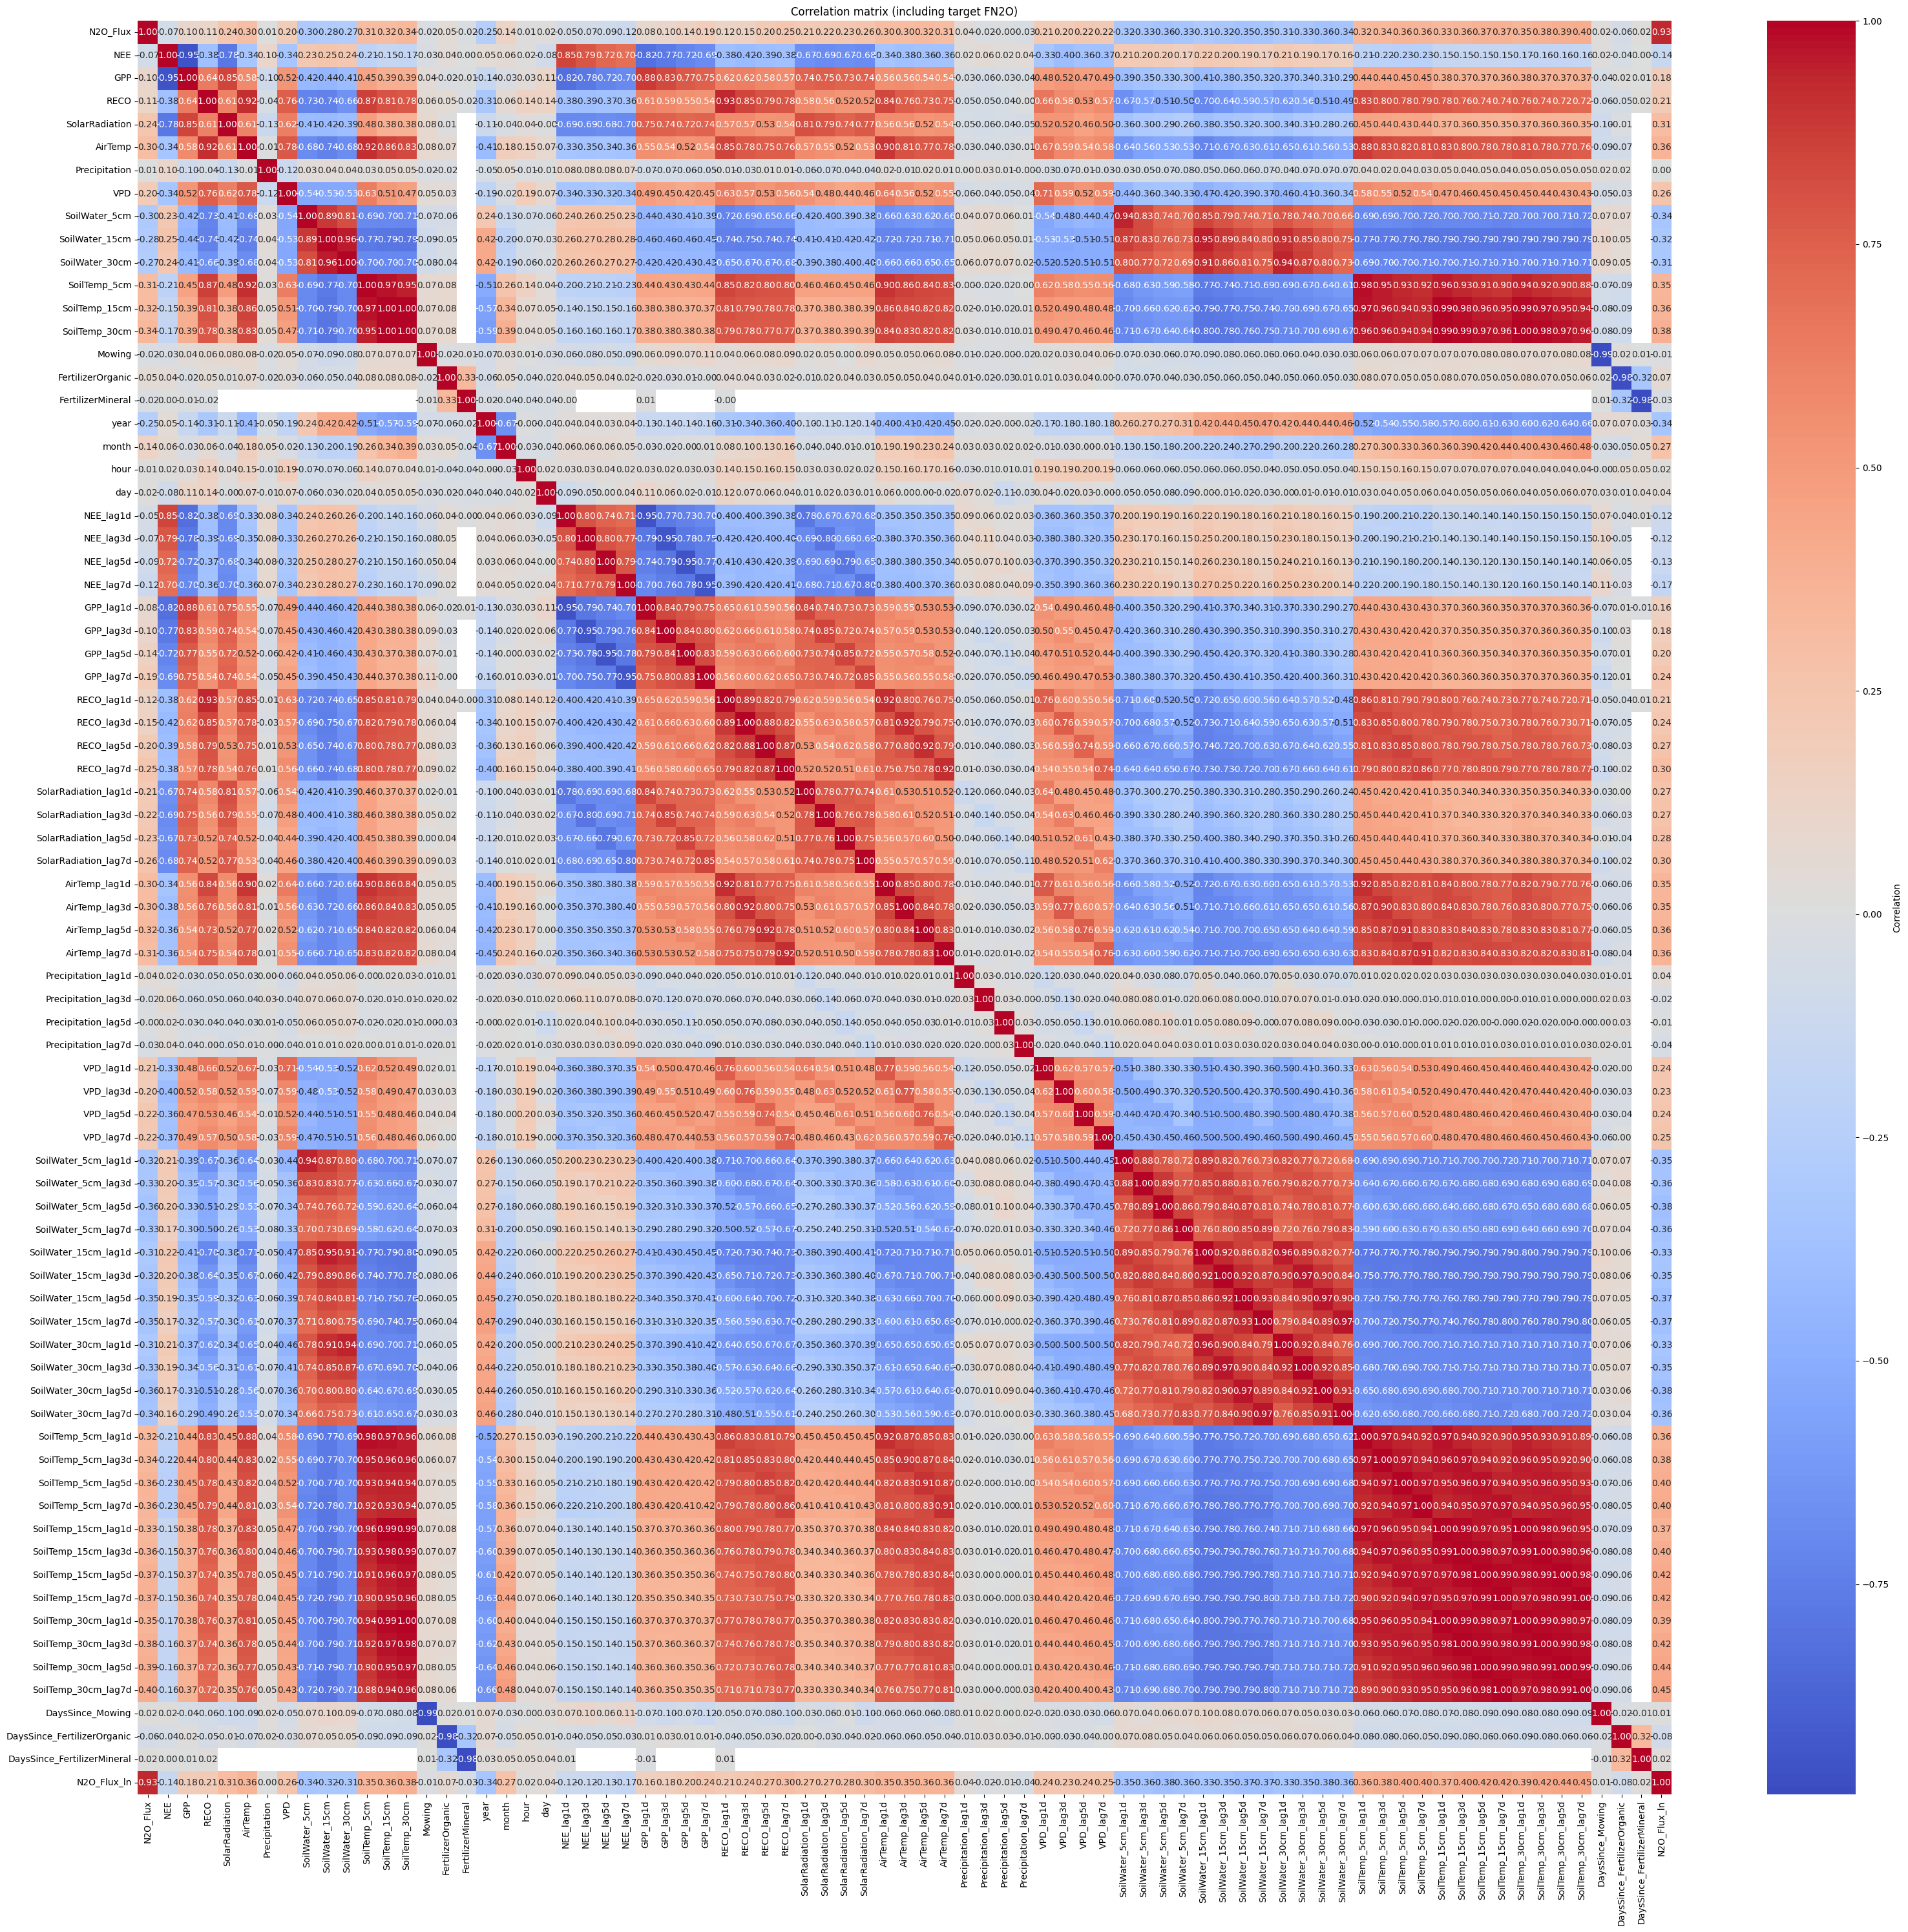

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = forel.corr(numeric_only=True)

plt.figure(figsize=(32,30))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_time_series(df, vars_to_plot):
    """
    Plot time series of selected variables with real time gaps shown on the x-axis.
    Automatically formats time labels and adds axis labels.
    """
    df = df.copy().sort_index()

    # --- Ensure datetime index ---
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Layout ---
    n_cols = 3
    n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
    axes = axes.flatten()

    # --- Plot each variable ---
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        ax.plot(df.index, df[var], lw=1)
        ax.set_title(var, fontsize=10)
        ax.set_ylabel(var)
        ax.grid(True, alpha=0.3)

        # Format the x-axis as dates
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        ax.tick_params(axis='x', rotation=45)

    # --- Remove unused axes if any ---
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # --- Common labels and formatting ---
    fig.suptitle("Time Series", fontsize=14)
    fig.text(0.5, 0.04, "Date", ha='center', fontsize=12)
    fig.tight_layout(rect=[0, 0.05, 1, 0.97])
    plt.show()

Raw Data


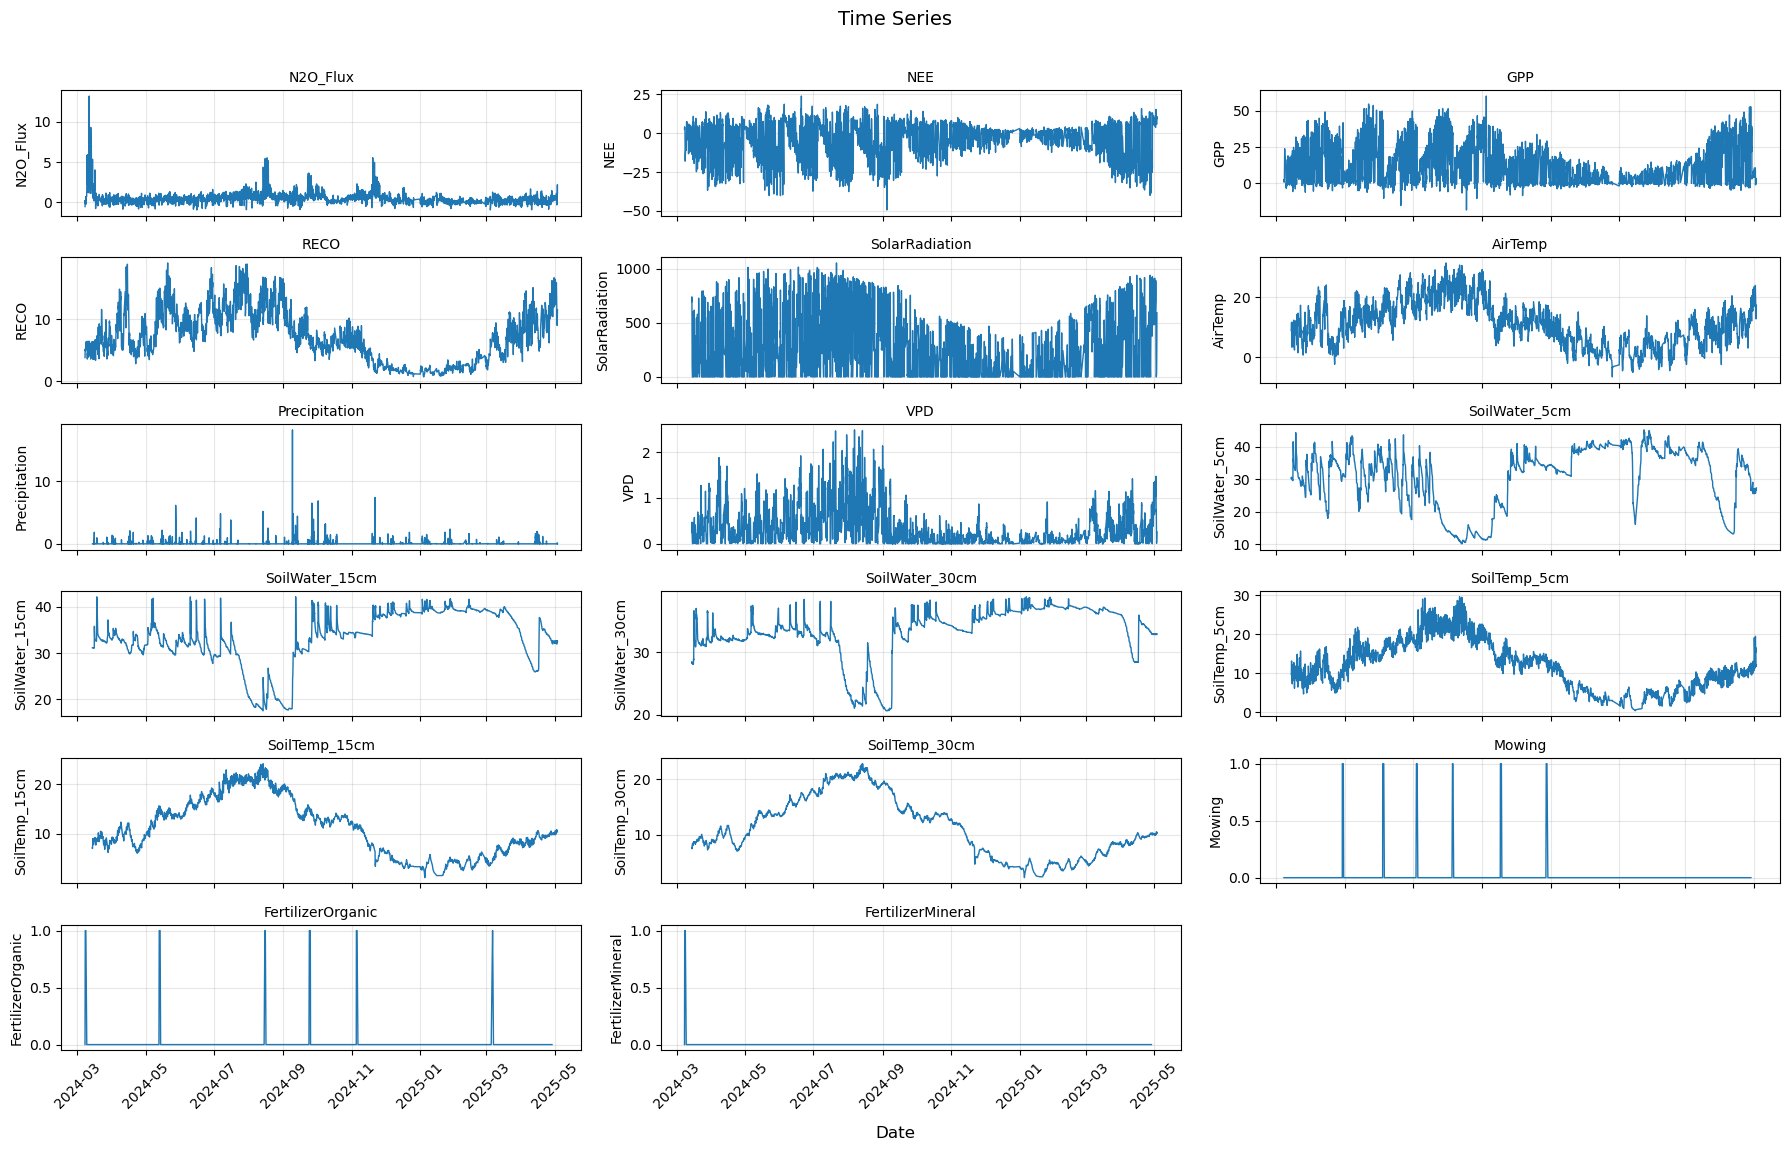

Daily Freq


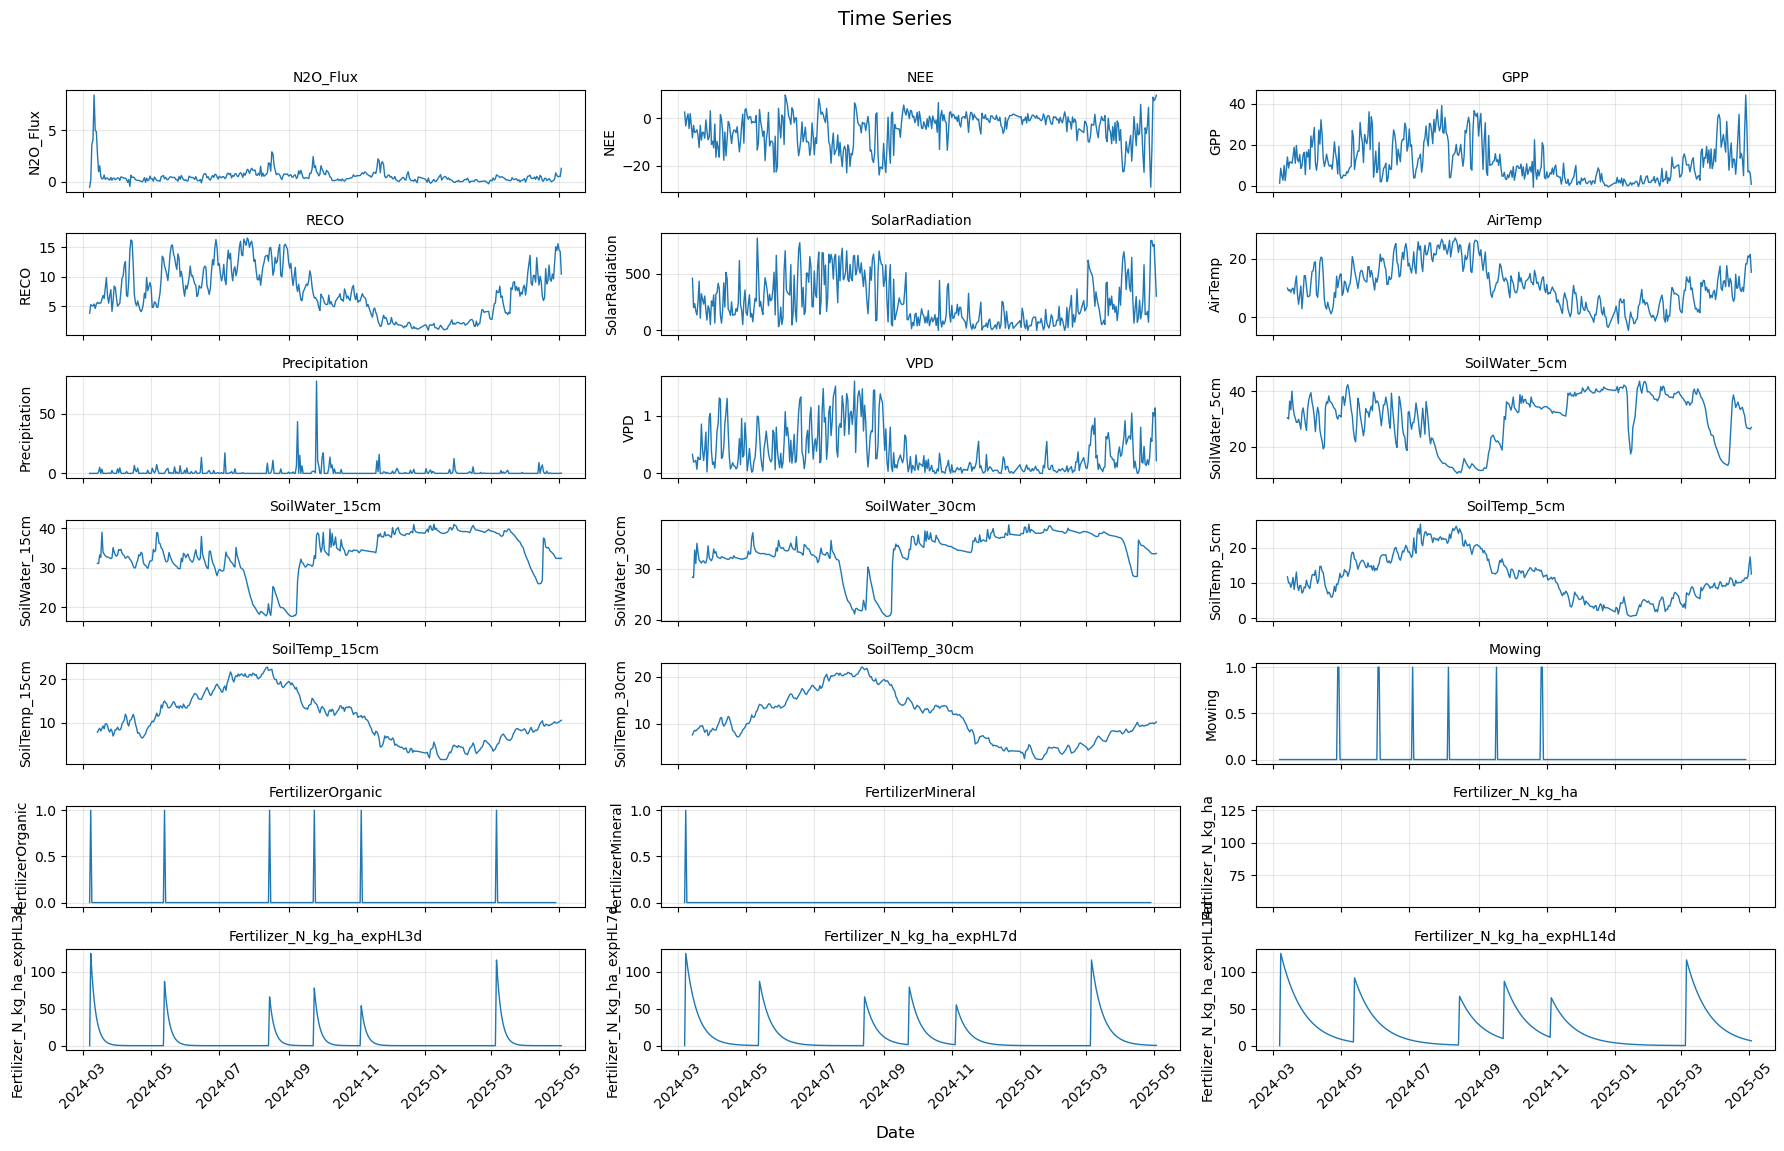

In [24]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral",
]

# Variables to plot (excluding Timestamp)
vars_to_plot_w_fert = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "Fertilizer_N_kg_ha",
     "Fertilizer_N_kg_ha_expHL3d", 	"Fertilizer_N_kg_ha_expHL7d" ,	"Fertilizer_N_kg_ha_expHL14d"
]

# Daily averages
print("Raw Data")
plot_time_series(forel, vars_to_plot)
print("Daily Freq")
plot_time_series(forel_daily, vars_to_plot_w_fert)

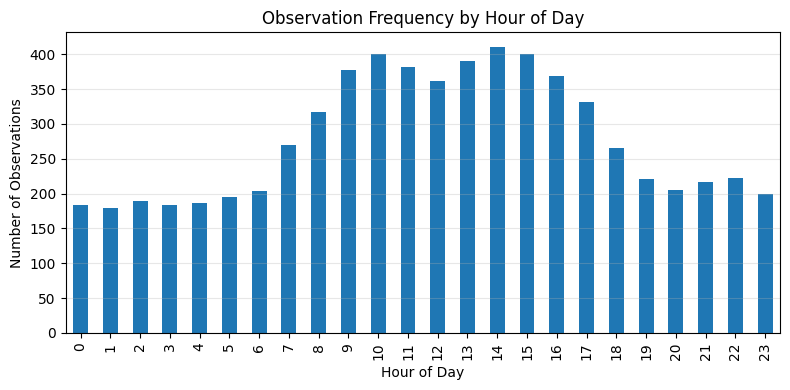

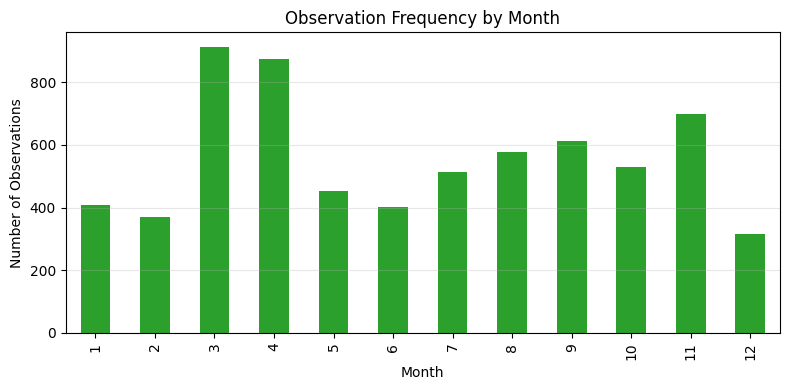

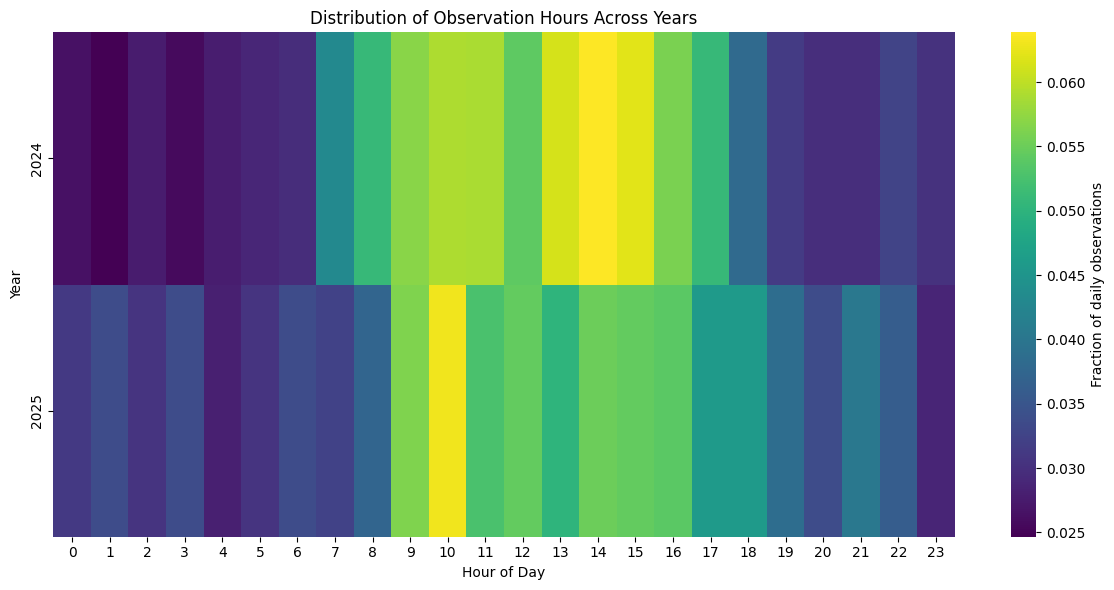

In [33]:
# count observations per hour
hourly_counts = forel["hour"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
hourly_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Hour of Day")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# count per month
monthly_counts = forel["month"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
monthly_counts.plot(kind="bar", color="tab:green")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Month")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# group by year × hour
hour_year_counts = (
    forel.groupby(["year", "hour"])
    .size()
    .unstack(fill_value=0)
)

# normalize by total per year (to compare proportions)
hour_year_norm = hour_year_counts.div(hour_year_counts.sum(axis=1), axis=0)

# plot as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_year_norm, cmap="viridis", cbar_kws={"label": "Fraction of daily observations"})
plt.xlabel("Hour of Day")
plt.ylabel("Year")
plt.title("Distribution of Observation Hours Across Years")
plt.tight_layout()
plt.show()

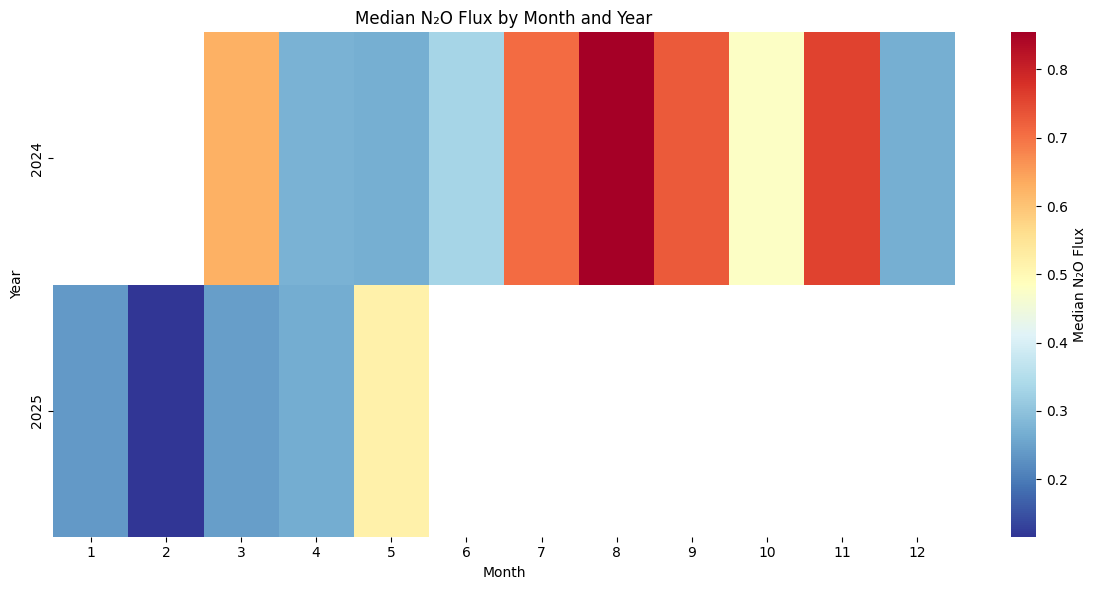

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_52295/1313960897.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  forel.groupby(["T5_bin", "T15_bin"])["N2O_Flux"]


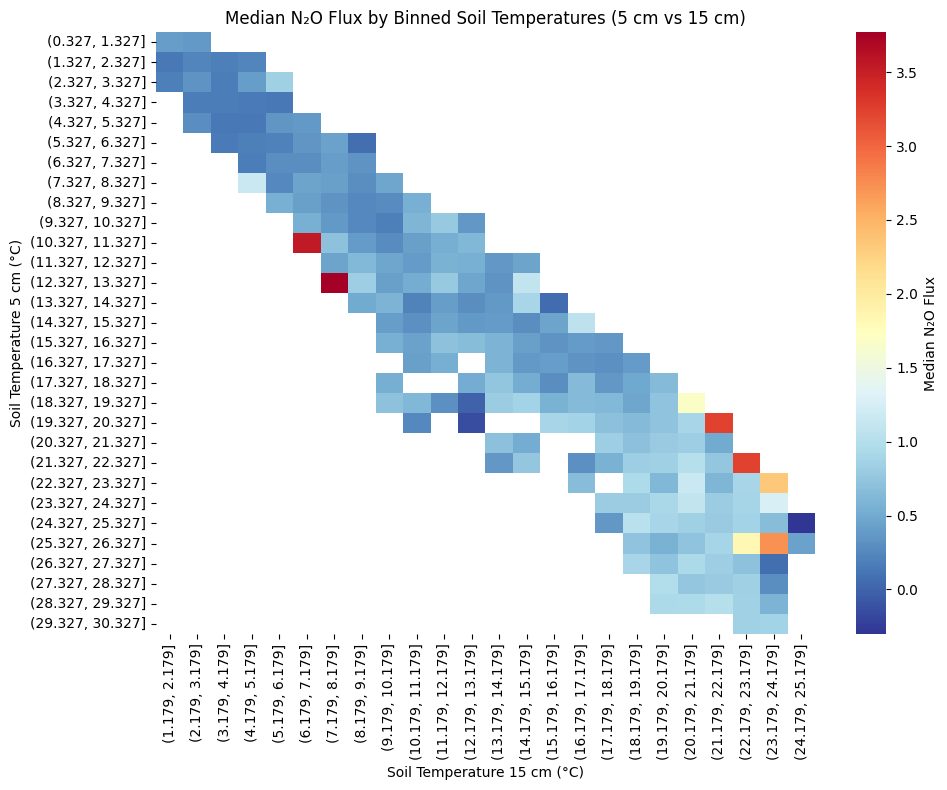

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# compute median N₂O flux per year × hour
median_flux = (
    forel.groupby(["year", "month"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    median_flux,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Median N₂O Flux by Month and Year")
plt.tight_layout()
plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define bin edges for both temperatures
bins_5cm = np.arange(forel["SoilTemp_5cm"].min(), forel["SoilTemp_5cm"].max()+1, 1)
bins_15cm = np.arange(forel["SoilTemp_15cm"].min(), forel["SoilTemp_15cm"].max()+1, 1)

# create binned categories
forel["T5_bin"] = pd.cut(forel["SoilTemp_5cm"], bins=bins_5cm)
forel["T15_bin"] = pd.cut(forel["SoilTemp_15cm"], bins=bins_15cm)

# compute median flux per 2D bin
median_flux_binned = (
    forel.groupby(["T5_bin", "T15_bin"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    median_flux_binned,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Soil Temperature 15 cm (°C)")
plt.ylabel("Soil Temperature 5 cm (°C)")
plt.title("Median N₂O Flux by Binned Soil Temperatures (5 cm vs 15 cm)")
plt.tight_layout()
plt.show()

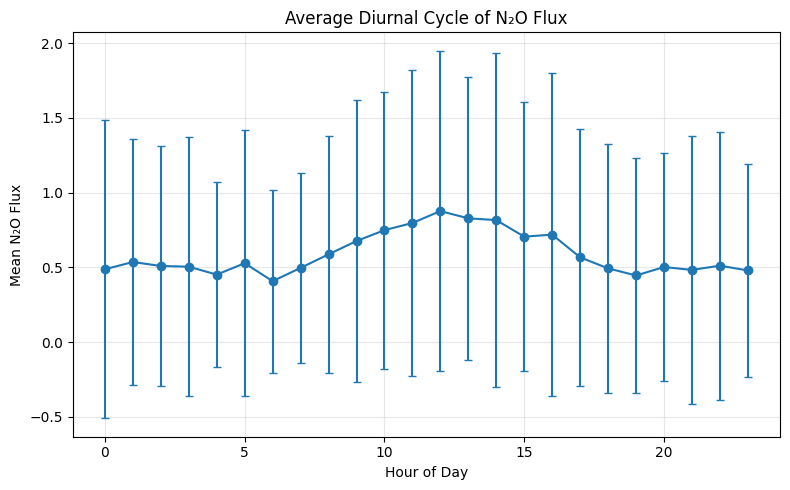

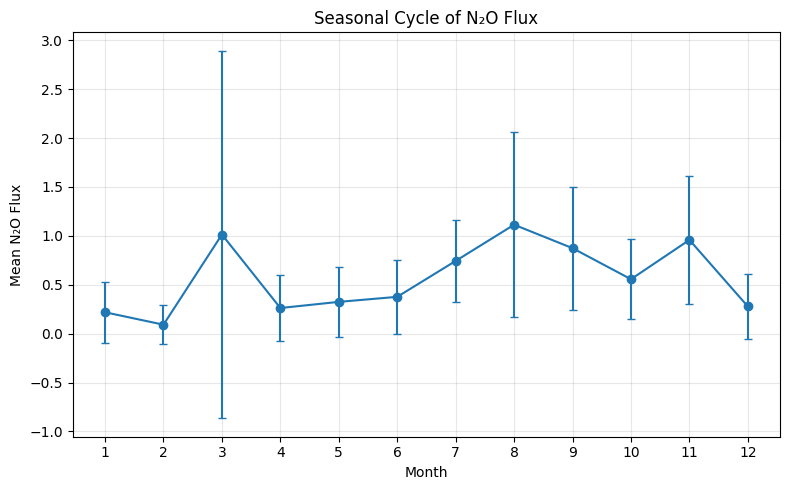

In [35]:
hourly_mean = forel.groupby("hour")["N2O_Flux"].mean()
hourly_std  = forel.groupby("hour")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(hourly_mean.index, hourly_mean, yerr=hourly_std, fmt="-o", capsize=3)
plt.xlabel("Hour of Day")
plt.ylabel("Mean N₂O Flux")
plt.title("Average Diurnal Cycle of N₂O Flux")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

monthly_mean = forel.groupby("month")["N2O_Flux"].mean()
monthly_std  = forel.groupby("month")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(monthly_mean.index, monthly_mean, yerr=monthly_std, fmt="-o", capsize=3)
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Mean N₂O Flux")
plt.title("Seasonal Cycle of N₂O Flux")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

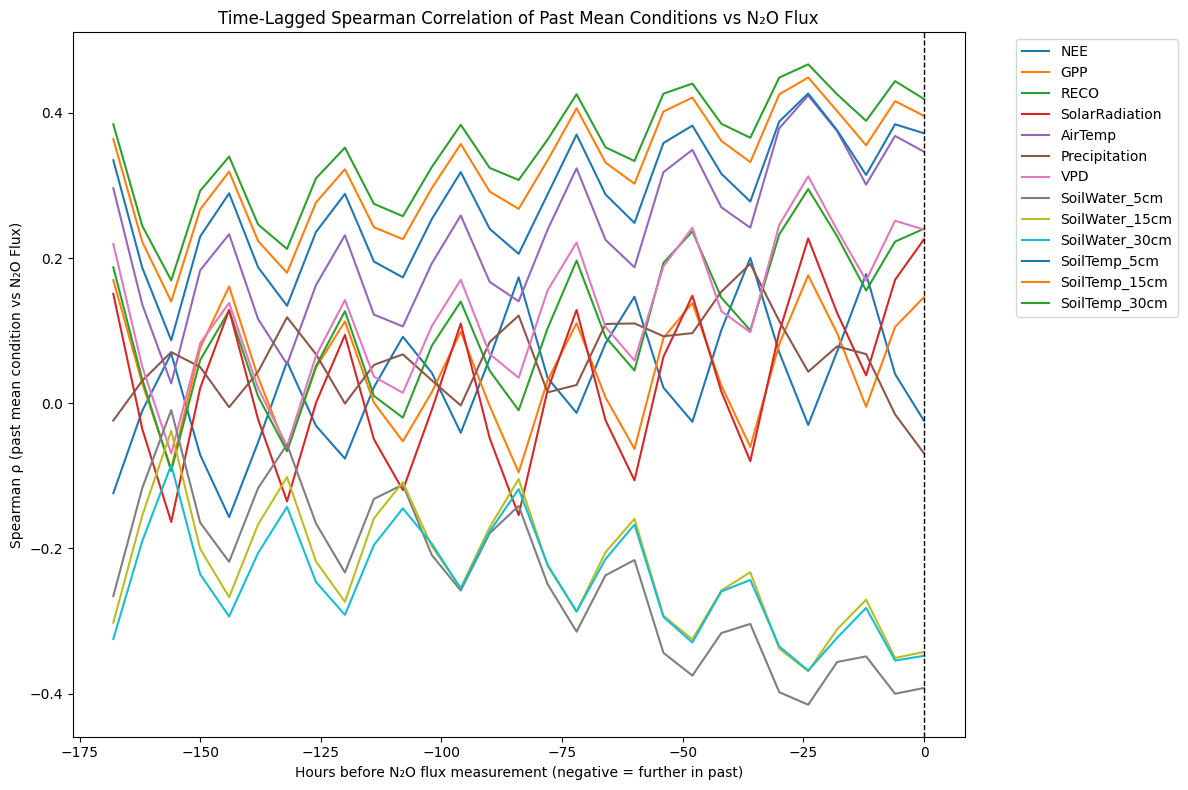

In [36]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Base setup ---
forel_time_index = forel.copy()

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
]

target = "N2O_Flux"

# --- Parameters ---
window_hours = 24        # window size for averaging (past 24h)
step_hours   = 6        # step between lags
max_hours    = 7 * 24    # look back 1 week (you can extend to 5 weeks)
offsets      = range(0, -max_hours - step_hours, -step_hours)  # only past (0, -24, -48, ...)

# --- Rolling mean of predictors (24h backward window) ---
window = f"{window_hours}h"
rolling_means = forel_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations (Spearman) ---
lag_corrs = {}

for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = forel_time_index[[target]].join(shifted.rename("past_mean")).dropna()
        if len(aligned) > 2:
            rho, _ = spearmanr(aligned[target], aligned["past_mean"])
            corrs.append(rho)
        else:
            corrs.append(np.nan)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot results ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours before N₂O flux measurement (negative = further in past)")
plt.ylabel("Spearman ρ (past mean condition vs N₂O Flux)")
plt.title("Time-Lagged Spearman Correlation of Past Mean Conditions vs N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

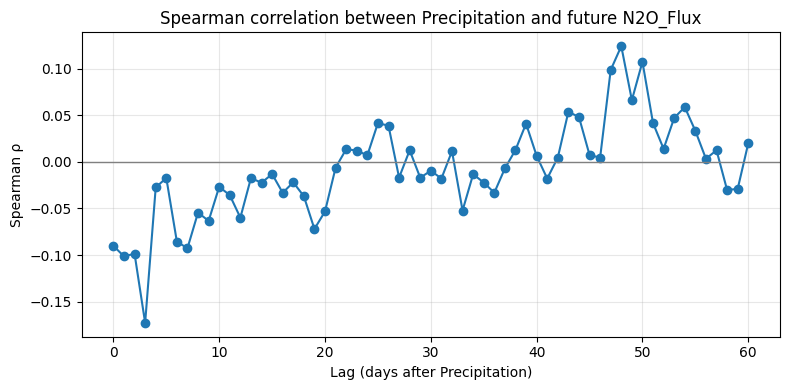

Peak Spearman correlation at lag = 48 days (ρ = 0.124)


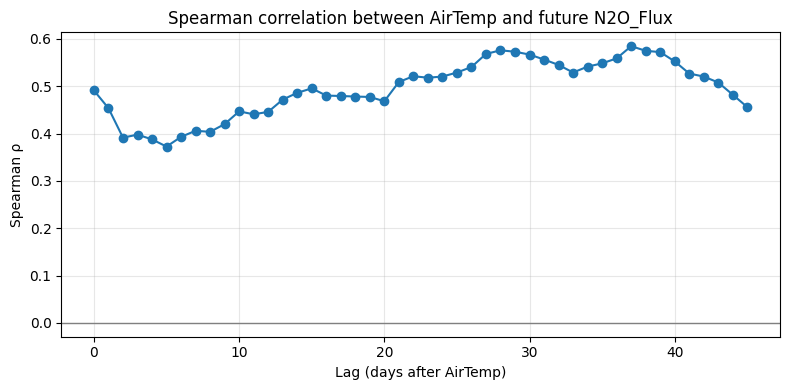

Peak Spearman correlation at lag = 37 days (ρ = 0.585)


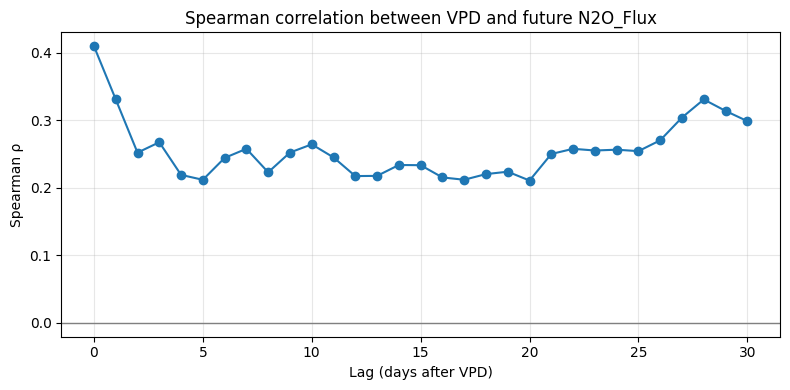

Peak Spearman correlation at lag = 0 days (ρ = 0.410)


In [37]:
from scipy.stats import spearmanr

def plot_lag_correlation(df, col, target="N2O_Flux", max_lag=60, resample_daily=True):
    """
    Compute and plot the Spearman correlation between a predictor and target variable
    over increasing day lags (calendar-based).

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with a DatetimeIndex.
    col : str
        Column name of the predictor variable (e.g. "Precipitation").
    target : str, optional
        Column name of the target variable, by default "N2O_Flux".
    max_lag : int, optional
        Maximum lag in days, by default 60.
    resample_daily : bool, optional
        If True, resample to daily mean (useful if data is sub-daily).

    Returns
    -------
    pd.DataFrame
        DataFrame with 'lag' and 'spearman_r' for each lag.
    """

    # --- Ensure datetime index ---
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Optional daily resampling ---
    if resample_daily:
        df = df.select_dtypes(include=[np.number]).resample("D").mean()

    # --- Filter for valid positive flux values ---
    df = df[df[target] >= 0][[col, target]].dropna(subset=[target])

    # --- Compute lag correlations ---
    lags = np.arange(0, max_lag + 1)
    corrs = []

    for lag in lags:
        shifted = df[col].shift(freq=pd.to_timedelta(lag, unit="D"))
        aligned = pd.concat([df[target], shifted], axis=1, join="inner").dropna()

        if aligned.empty:
            corrs.append(np.nan)
        else:
            r, _ = spearmanr(aligned[target], aligned[col])
            corrs.append(r)

    # --- Store results ---
    result = pd.DataFrame({"lag_days": lags, "spearman_r": corrs})

    # --- Plot ---
    plt.figure(figsize=(8, 4))
    plt.plot(result["lag_days"], result["spearman_r"], marker="o", color="tab:blue")
    plt.axhline(0, color="gray", lw=1)
    plt.xlabel(f"Lag (days after {col})")
    plt.ylabel("Spearman ρ")
    plt.title(f"Spearman correlation between {col} and future {target}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Report peak correlation ---
    best_lag = result["lag_days"].iloc[np.nanargmax(result["spearman_r"])]
    best_r = np.nanmax(result["spearman_r"])
    print(f"Peak Spearman correlation at lag = {best_lag} days (ρ = {best_r:.3f})")

plot_lag_correlation(forel, col="Precipitation", max_lag=60)
plot_lag_correlation(forel, col="AirTemp", max_lag=45)
plot_lag_correlation(forel, col="VPD", max_lag=30)

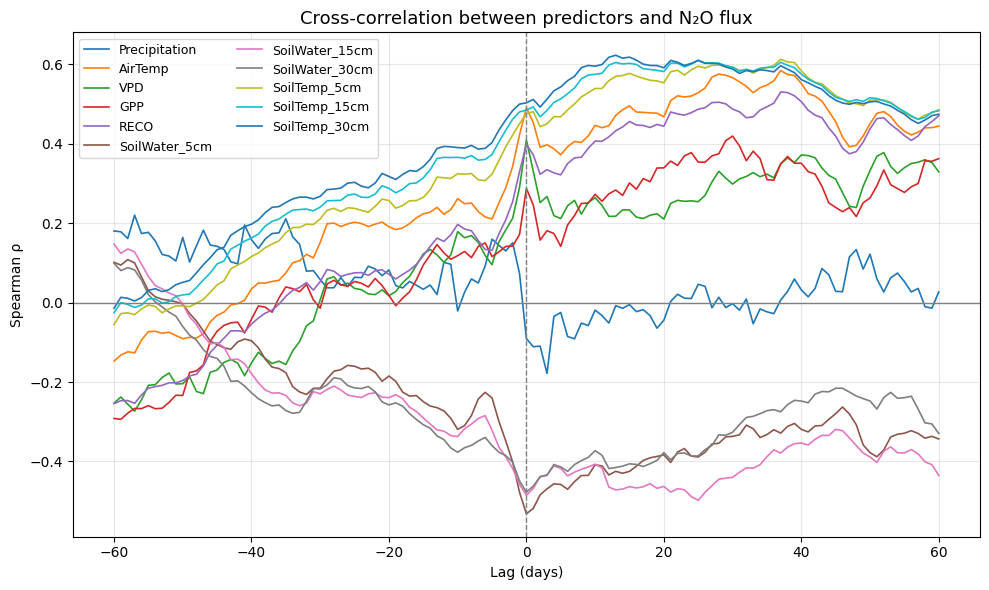

          Variable  Best lag (days)  Max corr (ρ)
10   SoilTemp_30cm               13         0.623
8     SoilTemp_5cm               37         0.613
9    SoilTemp_15cm               25         0.611
1          AirTemp               37         0.585
5    SoilWater_5cm                0        -0.532
4             RECO               37         0.531
6   SoilWater_15cm               25        -0.498
7   SoilWater_30cm                0        -0.478
3              GPP               30         0.420
2              VPD                0         0.410
0    Precipitation              -57         0.220


In [38]:
def cross_correlation_single(df, predictor_vars, target="N2O_Flux", max_lag=60):
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        if "Date" in df.columns:
            df["Date"] = pd.to_datetime(df["Date"])
            df = df.set_index("Date")
        else:
            raise ValueError("DataFrame must have a DatetimeIndex or 'Date' column")

    df = df[df[target] >= 0].dropna(subset=[target])
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    predictor_vars = [v for v in predictor_vars if v in numeric_cols]
    lags = np.arange(-max_lag, max_lag + 1)
    
    # Sort by index
    df = df.sort_index()
    corrs_dict = {}

    # Compute correlations for each predictor
    for var in predictor_vars:
        corrs = []
        for lag in lags:
            shifted = df[var].shift(freq=pd.to_timedelta(lag, unit="D"))
            aligned = pd.concat([df[target], shifted], axis=1, join="inner").dropna()
            rho = np.nan if aligned.empty else spearmanr(aligned[target], aligned[var])[0]
            corrs.append(rho)
        corrs_dict[var] = corrs

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for var, corrs in corrs_dict.items():
        ax.plot(lags, corrs, lw=1.2, label=var)

    ax.axhline(0, color="gray", lw=1)
    ax.axvline(0, color="gray", lw=1, ls="--")
    ax.set_xlabel("Lag (days)")
    ax.set_ylabel("Spearman ρ")
    ax.set_title("Cross-correlation between predictors and N₂O flux", fontsize=13)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="best", ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()

    # --- Summary ---
    summary_rows = []
    for var, corrs in corrs_dict.items():
        best_idx = np.nanargmax(np.abs(corrs))
        summary_rows.append({
            "Variable": var,
            "Best lag (days)": int(lags[best_idx]),
            "Max corr (ρ)": corrs[best_idx],
        })

    summary_df = pd.DataFrame(summary_rows)
    summary_df = (
        summary_df
        .sort_values(
            by="Max corr (ρ)",
            ascending=False,
            key=lambda col: np.abs(col) if col.name == "Max corr (ρ)" else col
        )
        .round(3)
    )

    return summary_df

predictors = [
    "Precipitation", "AirTemp", "VPD", "GPP", "RECO",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

summary = cross_correlation_single(forel_daily, predictor_vars=predictors, max_lag=60)
print(summary)

Found 6 fertilization events


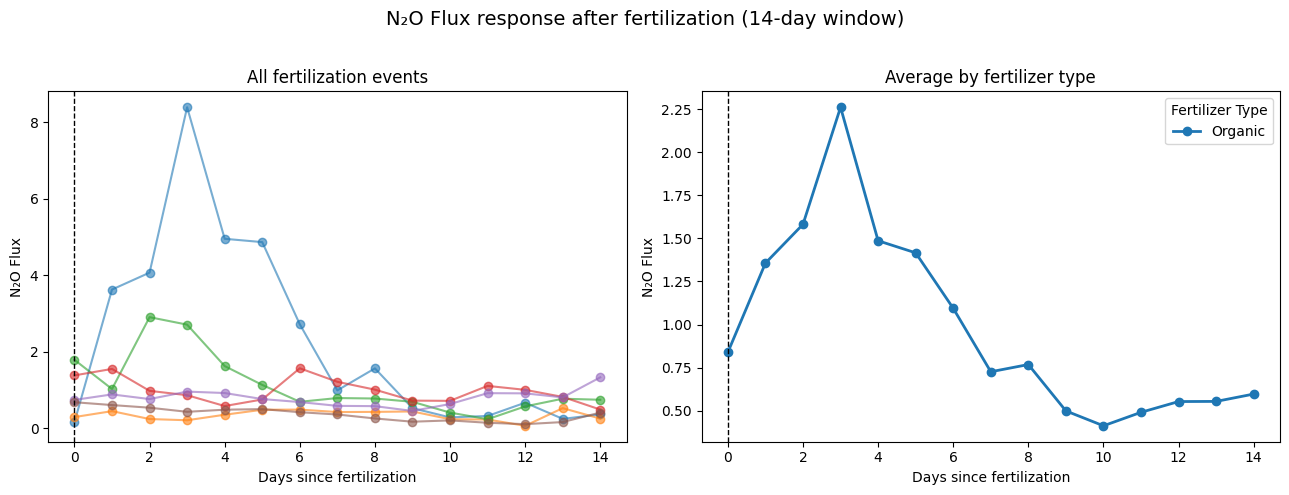

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Identify fertilization events ---
fert_events = forel_daily[
    (forel_daily["FertilizerOrganic"] == 1) |
    (forel_daily["FertilizerMineral"] == 1)
].copy()

# Date is already the index, so we'll work with that
print(f"Found {len(fert_events)} fertilization events")

# --- Extract N₂O fluxes for 14 days after each event ---
window_days = 14
records = []

for event_date, event in fert_events.iterrows():
    # event_date is already a datetime since it's the index
    subset = forel_daily[
        (forel_daily.index >= event_date) &
        (forel_daily.index <= event_date + pd.Timedelta(days=window_days))
    ].copy()
    
    subset["days_since_fert"] = (subset.index - event_date).days
    subset["event_date"] = event_date
    subset["fert_type"] = (
        "Organic" if event["FertilizerOrganic"] == 1 else "Mineral"
    )
    records.append(subset)

fert_windows = pd.concat(records, ignore_index=False)

# --- Plot setup (1x2 grid) ---
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle("N₂O Flux response after fertilization (14-day window)", fontsize=14)

# --- Panel 1: All individual events ---
for event_date, group in fert_windows.groupby("event_date"):
    axes[0].plot(group["days_since_fert"], group["N2O_Flux"], marker="o", alpha=0.6)

axes[0].axvline(0, color="black", linestyle="--", linewidth=1)
axes[0].set_title("All fertilization events")
axes[0].set_xlabel("Days since fertilization")
axes[0].set_ylabel("N₂O Flux")

# --- Panel 2: Average by fertilizer type ---
for fert_type, group in fert_windows.groupby("fert_type"):
    mean_curve = group.groupby("days_since_fert")["N2O_Flux"].mean()
    axes[1].plot(mean_curve.index, mean_curve.values, marker="o", label=fert_type, linewidth=2)

axes[1].axvline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_title("Average by fertilizer type")
axes[1].set_xlabel("Days since fertilization")
axes[1].set_ylabel("N₂O Flux")
axes[1].legend(title="Fertilizer Type")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_52295/3841008925.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 0.96])


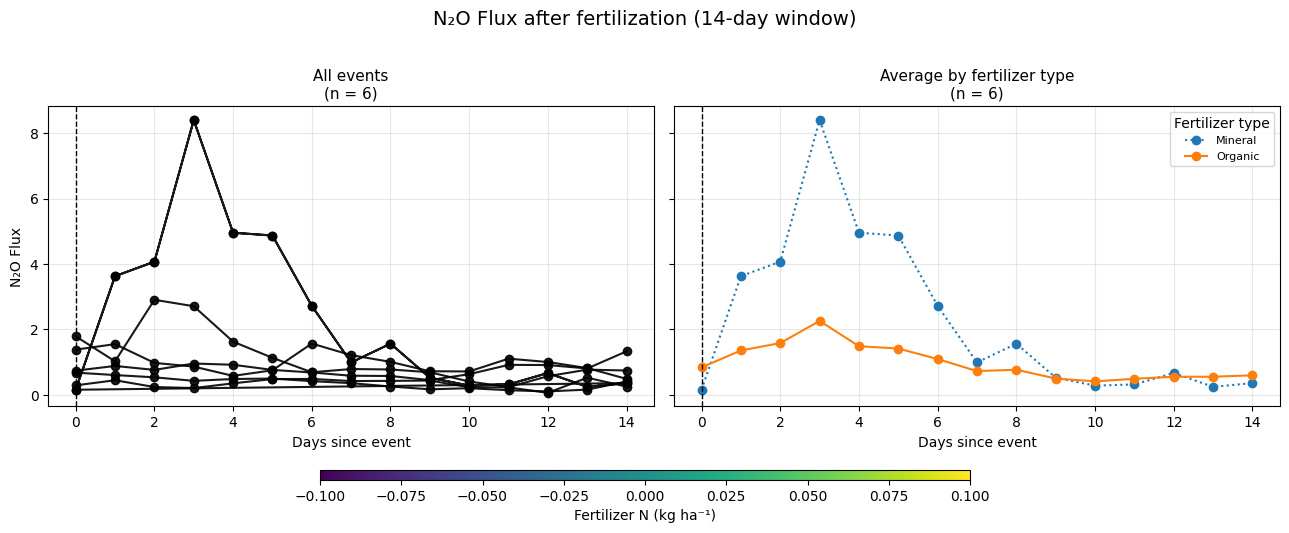

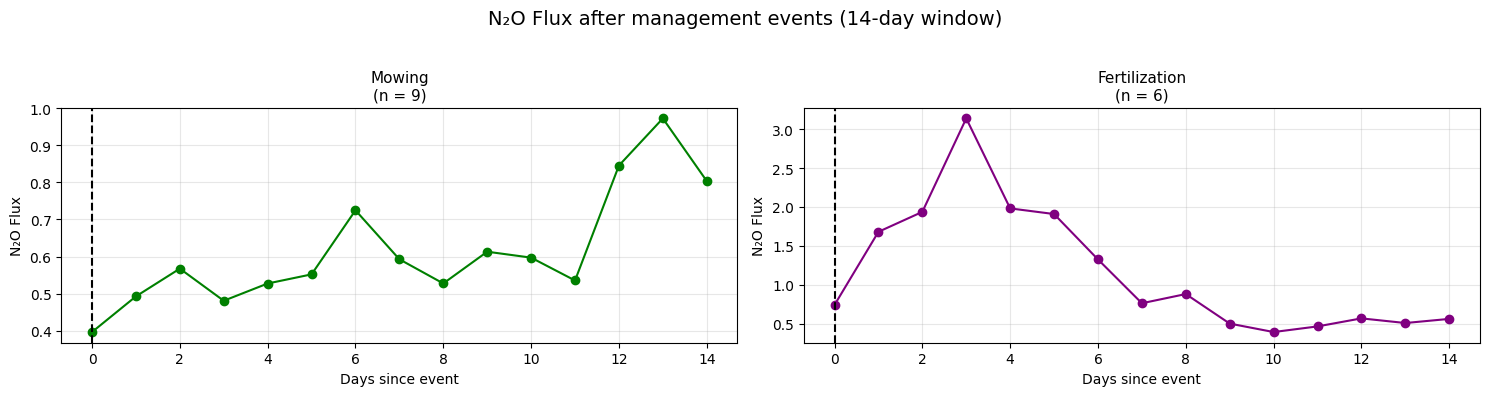

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# ==========================================================
# 1️⃣ Helper: extract N₂O flux windows after each management event
# ==========================================================
def extract_event_windows(df_daily, event_col, window_days=14):
    """
    Extract N₂O flux time windows following a management event.

    Args:
        df_daily : daily dataframe (must have Date as index, N2O_Flux, and event_col)
        event_col : column name for event (e.g., "Mowing")
        window_days : number of days after event to include
    """
    records = []
    events = df_daily[df_daily[event_col] == 1].copy()
    if events.empty:
        return pd.DataFrame()

    for event_date, event in events.iterrows():
        subset = df_daily[
            (df_daily.index >= event_date) &
            (df_daily.index <= event_date + pd.Timedelta(days=window_days))
        ].copy()

        subset["days_since_event"] = (subset.index - event_date).days
        subset["event_date"] = event_date
        subset["event_type"] = event_col  # keep event label
        records.append(subset)

    return pd.concat(records, ignore_index=False)


# ==========================================================
# 2️⃣ Create windows for each management type
# ==========================================================
mow_windows   = extract_event_windows(forel_daily, "Mowing")
fert_windows  = extract_event_windows(forel_daily, "FertilizerOrganic")
fert_windowsM = extract_event_windows(forel_daily, "FertilizerMineral")

# merge organic + mineral
fert_windows["event_type"] = "Organic"
fert_windowsM["event_type"] = "Mineral"
fert_windows = pd.concat([fert_windows, fert_windowsM], ignore_index=False)

# Add fertilizer amount (if available)
if "Fertilizer_N_kg_ha" not in fert_windows.columns:
    fert_windows["Fertilizer_N_kg_ha"] = 0.0

# ==========================================================
# 3️⃣ Fertilization plots
# ==========================================================
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
fig.suptitle("N₂O Flux after fertilization (14-day window)", fontsize=14)

# normalize fertilizer N for color mapping
norm = mcolors.Normalize(
    vmin=fert_windows["Fertilizer_N_kg_ha"].min(),
    vmax=fert_windows["Fertilizer_N_kg_ha"].max()
)
cmap = cm.viridis


def plot_fert_events(ax, df, title):
    if df.empty:
        ax.set_title(f"{title}\n(no events)", fontsize=10)
        return

    n_total = df["event_date"].nunique()

    for event_date, group in df.groupby("event_date"):
        n_val = group["Fertilizer_N_kg_ha"].iloc[0]
        fert_type = group["event_type"].iloc[0]
        color = cmap(norm(n_val))
        linestyle = "-" if "Organic" in fert_type else ":"
        ax.plot(
            group["days_since_event"], group["N2O_Flux"],
            color=color, linestyle=linestyle, marker="o", alpha=0.9
        )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(f"{title}\n(n = {n_total})", fontsize=11)
    ax.set_xlabel("Days since event")
    ax.set_ylabel("N₂O Flux")
    ax.grid(True, alpha=0.3)


# (a) All events
plot_fert_events(axes[0], fert_windows, "All events")

# (b) Average by fertilizer type
ax = axes[1]
for event_type, group in fert_windows.groupby("event_type"):
    mean_curve = group.groupby("days_since_event")["N2O_Flux"].mean()
    linestyle = "-" if "Organic" in event_type else ":"
    ax.plot(mean_curve.index, mean_curve.values,
            marker="o", label=event_type, linestyle=linestyle)
n_total = fert_windows["event_date"].nunique()

ax.axvline(0, color="black", linestyle="--", linewidth=1)
ax.set_title(f"Average by fertilizer type\n(n = {n_total})", fontsize=11)
ax.set_xlabel("Days since event")
ax.legend(title="Fertilizer type", fontsize=8)
ax.grid(True, alpha=0.3)

# colorbar
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Fertilizer N (kg ha⁻¹)")

plt.tight_layout(rect=[0, 0.07, 1, 0.96])
plt.show()

# ==========================================================
# 4️⃣ Management event plots
# ==========================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=False)
fig.suptitle("N₂O Flux after management events (14-day window)", fontsize=14)

management_panels = [
    (mow_windows, "Mowing", "green"),
    (fert_windows, "Fertilization", "purple")
]

for ax, (df, label, color) in zip(axes, management_panels):
    if df.empty:
        ax.set_title(f"{label}\n(no events)", fontsize=10)
        continue

    n_total = df["event_date"].nunique()

    mean_curve = df.groupby("days_since_event")["N2O_Flux"].mean()
    ax.plot(
        mean_curve.index, mean_curve.values,
        marker="o", color=color, linestyle="-"
    )

    ax.axvline(0, color="black", linestyle="--")
    ax.set_title(f"{label}\n(n = {n_total})", fontsize=11)
    ax.set_xlabel("Days since event")
    ax.set_ylabel("N₂O Flux")
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# PCA plots

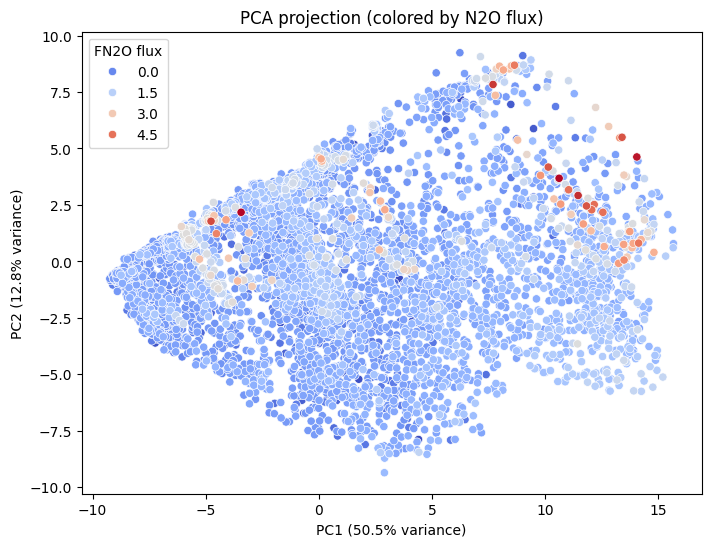

In [22]:
forel_clean = forel.dropna()
forel_clean = forel_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X_2 = forel_clean.drop(columns=["N2O_Flux", "time_diff", "Date"])
y_2 = forel_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

# Run PCA (2 components for visualization)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_2)

# Create DataFrame for plotting
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df_2["FN2O"] = y_2.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_2, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [23]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    index=X_2.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                           PC1       PC2
SoilTemp_5cm_lag3d    0.151218  0.066749
SoilTemp_5cm_lag5d    0.151186  0.070907
SoilTemp_5cm_lag7d    0.150999  0.073251
SoilTemp_5cm_lag1d    0.150729  0.061141
SoilTemp_5cm          0.150272  0.056390
...                        ...       ...
SoilWater_30cm       -0.135516 -0.045097
SoilWater_15cm_lag5d -0.137067 -0.091006
SoilWater_15cm_lag3d -0.141649 -0.079985
SoilWater_15cm_lag1d -0.144362 -0.063830
SoilWater_15cm       -0.145075 -0.050920

[76 rows x 2 columns]


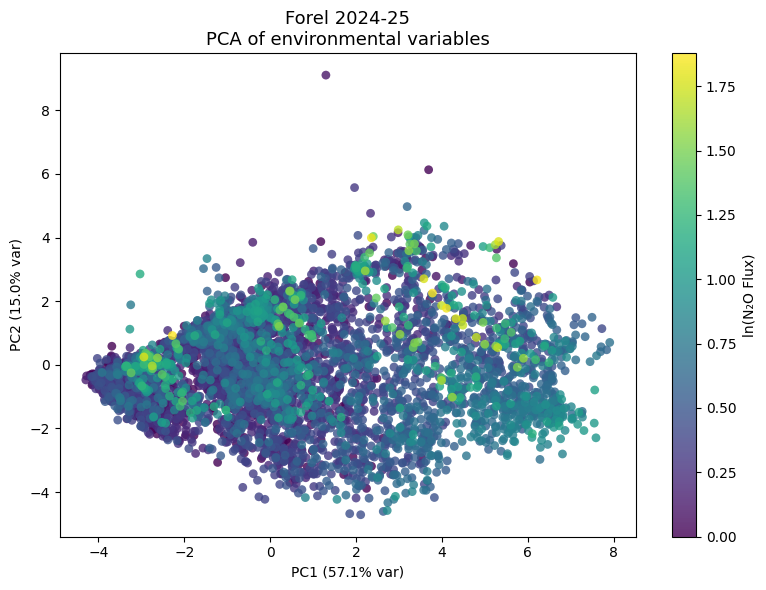

In [24]:
import matplotlib.cm as cm

# --- transformation ---
forel_clean["N2O_Flux_ln"] = np.where(
    forel_clean["N2O_Flux"] > 0,
    np.log1p(forel_clean["N2O_Flux"]),
    0
)

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for forel 2024-25
# =============================================
plot_pca(forel_clean, "Forel 2024-25")

# t-SNE plots

In [27]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X_2 = X_2.dropna()
y_2 = y_2.loc[X_2.index]

# Scale predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

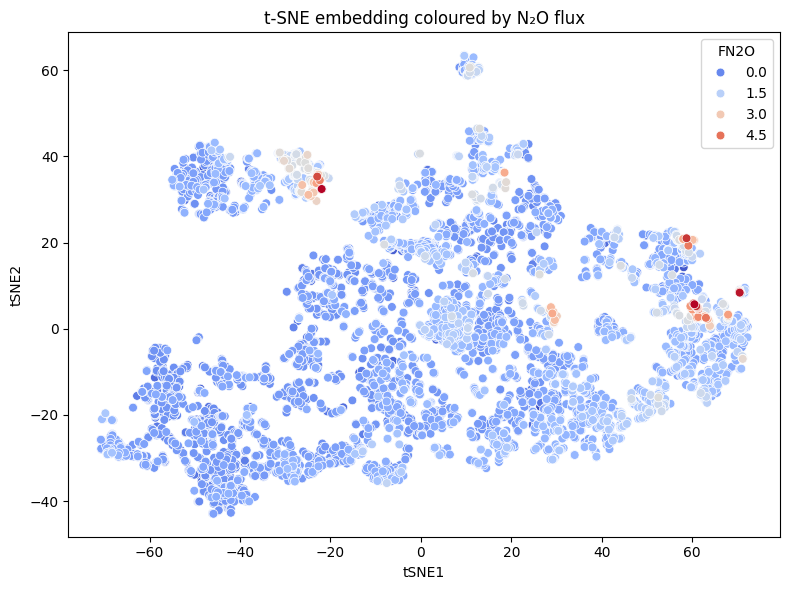

In [28]:
from sklearn.manifold import TSNE

tsne_2 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X_scaled_2)

tsne_df_2 = pd.DataFrame(X_tsne_2, columns=["tSNE1", "tSNE2"])
tsne_df_2["FN2O"] = y_2.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_2, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

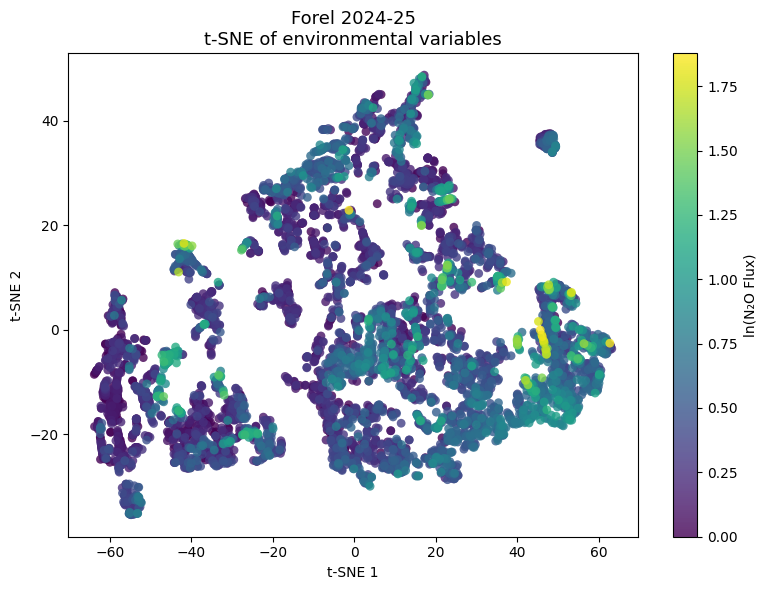

In [29]:
# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Forel 2024-25
# =============================================
plot_tsne(forel_clean, "Forel 2024-25")

# UMAP plots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


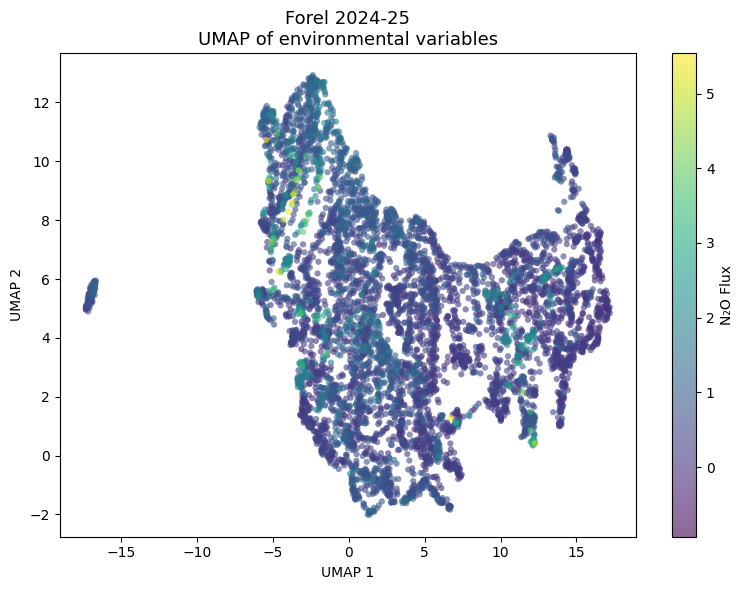

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Forel 2024-25
# =============================================
plot_umap(forel_clean, "Forel 2024-25")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


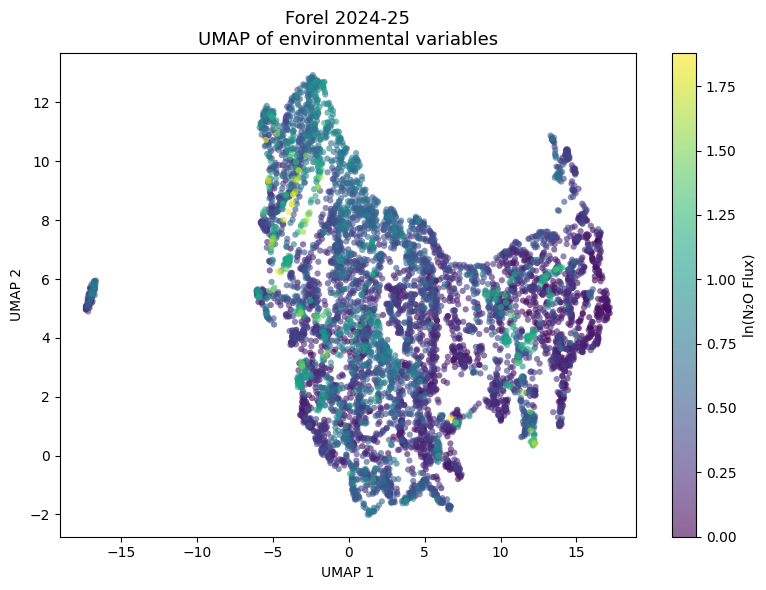

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Forel 2024-25
# =============================================
plot_umap(forel_clean, "Forel 2024-25")